# Tunisia Real Estate Analysis

## Introduction:
- In this Analysis, we are going to delve into the dynamic landscape of real estate in Tunisia, aiming to uncover insights and trends that can inform stakeholders, investors, and policymakers alike.

## Data loading:

### Importing Libraries:

In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.3.3"


### loading the dataset

In [2]:
data <- read.csv("dataset/tunisia-real-estate.csv",
stringsAsFactors = TRUE,
header = TRUE, dec = ".",
sep = ",")

## Data exploration:

### Viewing the structure of the dataset:

In [3]:
# View the Column Names
names(data)
# View the first few rows of the dataset
head(data)

# View the data Size
dim(data)

# View the structure of the dataset
str(data)

[1] "Governorate"         "Delegation"          "Locality"           
[4] "Nature"              "Type.of.Real.Estate" "Surface"            
[7] "Price"               "Inserted.On"

,Governorate,Delegation,Locality,Nature,Type.of.Real.Estate,Surface,Price,Inserted.On
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,Tunis,Sidi El Bechir,Sidi El Bechir,Sale,2-room apartment,70,120000,06/10/2023
2,Sousse,Akouda,Akouda,Sale,2-room apartment,74,230000,05/10/2023
3,Tunis,La Marsa,La Marsa,Rental,Houses,400,6500,30/10/2023
4,Tunis,Carthage,Carthage,Rental,Surfaces,180,1400,02/11/2023
5,Sousse,Hammam Sousse,Hammam Sousse,Sale,3-room apartment,145,160000,26/06/2022
6,Tunis,La Marsa,La Marsa,Rental,2-room apartment,120,1500,18/09/2023


[1] 25317     8

'data.frame':	25317 obs. of  8 variables:
 $ Governorate        : Factor w/ 24 levels "Ariana","Beja",..: 23 20 23 23 20 23 23 1 23 23 ...
 $ Delegation         : Factor w/ 193 levels "Agareb","Ain Draham",..: 169 4 112 26 79 112 48 5 3 115 ...
 $ Locality           : Factor w/ 193 levels "Agareb","Ain Draham",..: 169 4 112 26 79 112 48 5 3 115 ...
 $ Nature             : Factor w/ 7 levels "Land","Offices & Shops",..: 5 5 4 4 5 4 4 5 7 4 ...
 $ Type.of.Real.Estate: Factor w/ 15 levels "1-room apartment",..: 2 2 10 13 3 2 12 8 2 12 ...
 $ Surface            : num  70 74 400 180 145 ...
 $ Price              : num  120000 230000 6500 1400 160000 1500 300 570000 150 650 ...
 $ Inserted.On        : Factor w/ 1000 levels "01/01/2014","01/01/2022",..: 194 161 974 63 832 578 793 167 48 552 ...


## Data cleaning:

### Checking for missing values:

In [4]:
# Check for missing values in the entire dataset
any(is.na(data))

# Check for missing values in specific columns
colSums(is.na(data))

[1] FALSE

Governorate          Delegation            Locality              Nature 
                  0                   0                   0                   0 
Type.of.Real.Estate             Surface               Price         Inserted.On 
                  0                   0                   0                   0

- there is no missing values in the dataset.

### Checking for duplicates:

In [5]:
# Check for duplicated rows
duplicated_rows <- data[duplicated(data), ]

### Rmeoving duplicates:

In [6]:
# Remove duplicated rows
data <- unique(data)

### Converting data types:

In [7]:
# Convert columns to appropriate data types
data$Price <- as.numeric(data$Price)
# Convert Date/Time columns
data$Inserted.On <- as.POSIXct(data$Inserted.On, format = "%Y-%m-%d %H:%M:%S")

## Descriptive Analysis:

### Summary Statistics for Price Variable:

In [8]:
# Summary statistics for price
summary(data$Price)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       2     1500   100000   422246   428000 16000000 

### Summary Statistics for Surface Variable:

In [9]:
# Summary statistics for Surface
summary(data$Surface)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0       90      179     9902      460 32000000 

### Frequency Table for Categorical Variables (Governorate, Delegation, Locality):

In [10]:
# Frequency table for Governorate
table_governorate <- table(data$Governorate)
print(table_governorate)

# Frequency table for Nature
table_nature <- table(data$Nature)
print(table_nature)

# Frequency table for Types of real estates
table_type_of_real_estate <- table(data$Type.of.Real.Estate)
print(table_type_of_real_estate)


     Ariana        Beja   Ben arous     Bizerte       Gabes       Gafsa 
       4605          86        2458         500          54          34 
   Jendouba    Kairouan   Kasserine      Kebili      Le Kef      Mahdia 
         35          18          13           3          69          95 
    Manouba    Medenine    Monastir      Nabeul        Sfax Sidi bouzid 
        512         153         167        5878         452          22 
    Siliana      Sousse   Tataouine      Tozeur       Tunis    Zaghouan 
         25        1378           6           9        8561         184 

           Land Offices & Shops        Purchase          Rental            Sale 
           4779            1860               2            9338            8966 
        Sharing Vacation rental 
             16             356 



         1-room apartment          2-room apartment          3-room apartment 
                     1716                      2941                      3595 
         4-room apartment 5-room apartment and more         Agricultural land 
                     1909                       489                      1363 
        Business property                    Duplex           Free management 
                      286                       579                        93 
                   Houses                    Office                     Other 
                     5495                       990                       933 
                 Surfaces               Vacant land          Workshop, Garage 
                     1396                      3416                       116 


## Data Visualization:

### Bar Plot for Governorate Variable

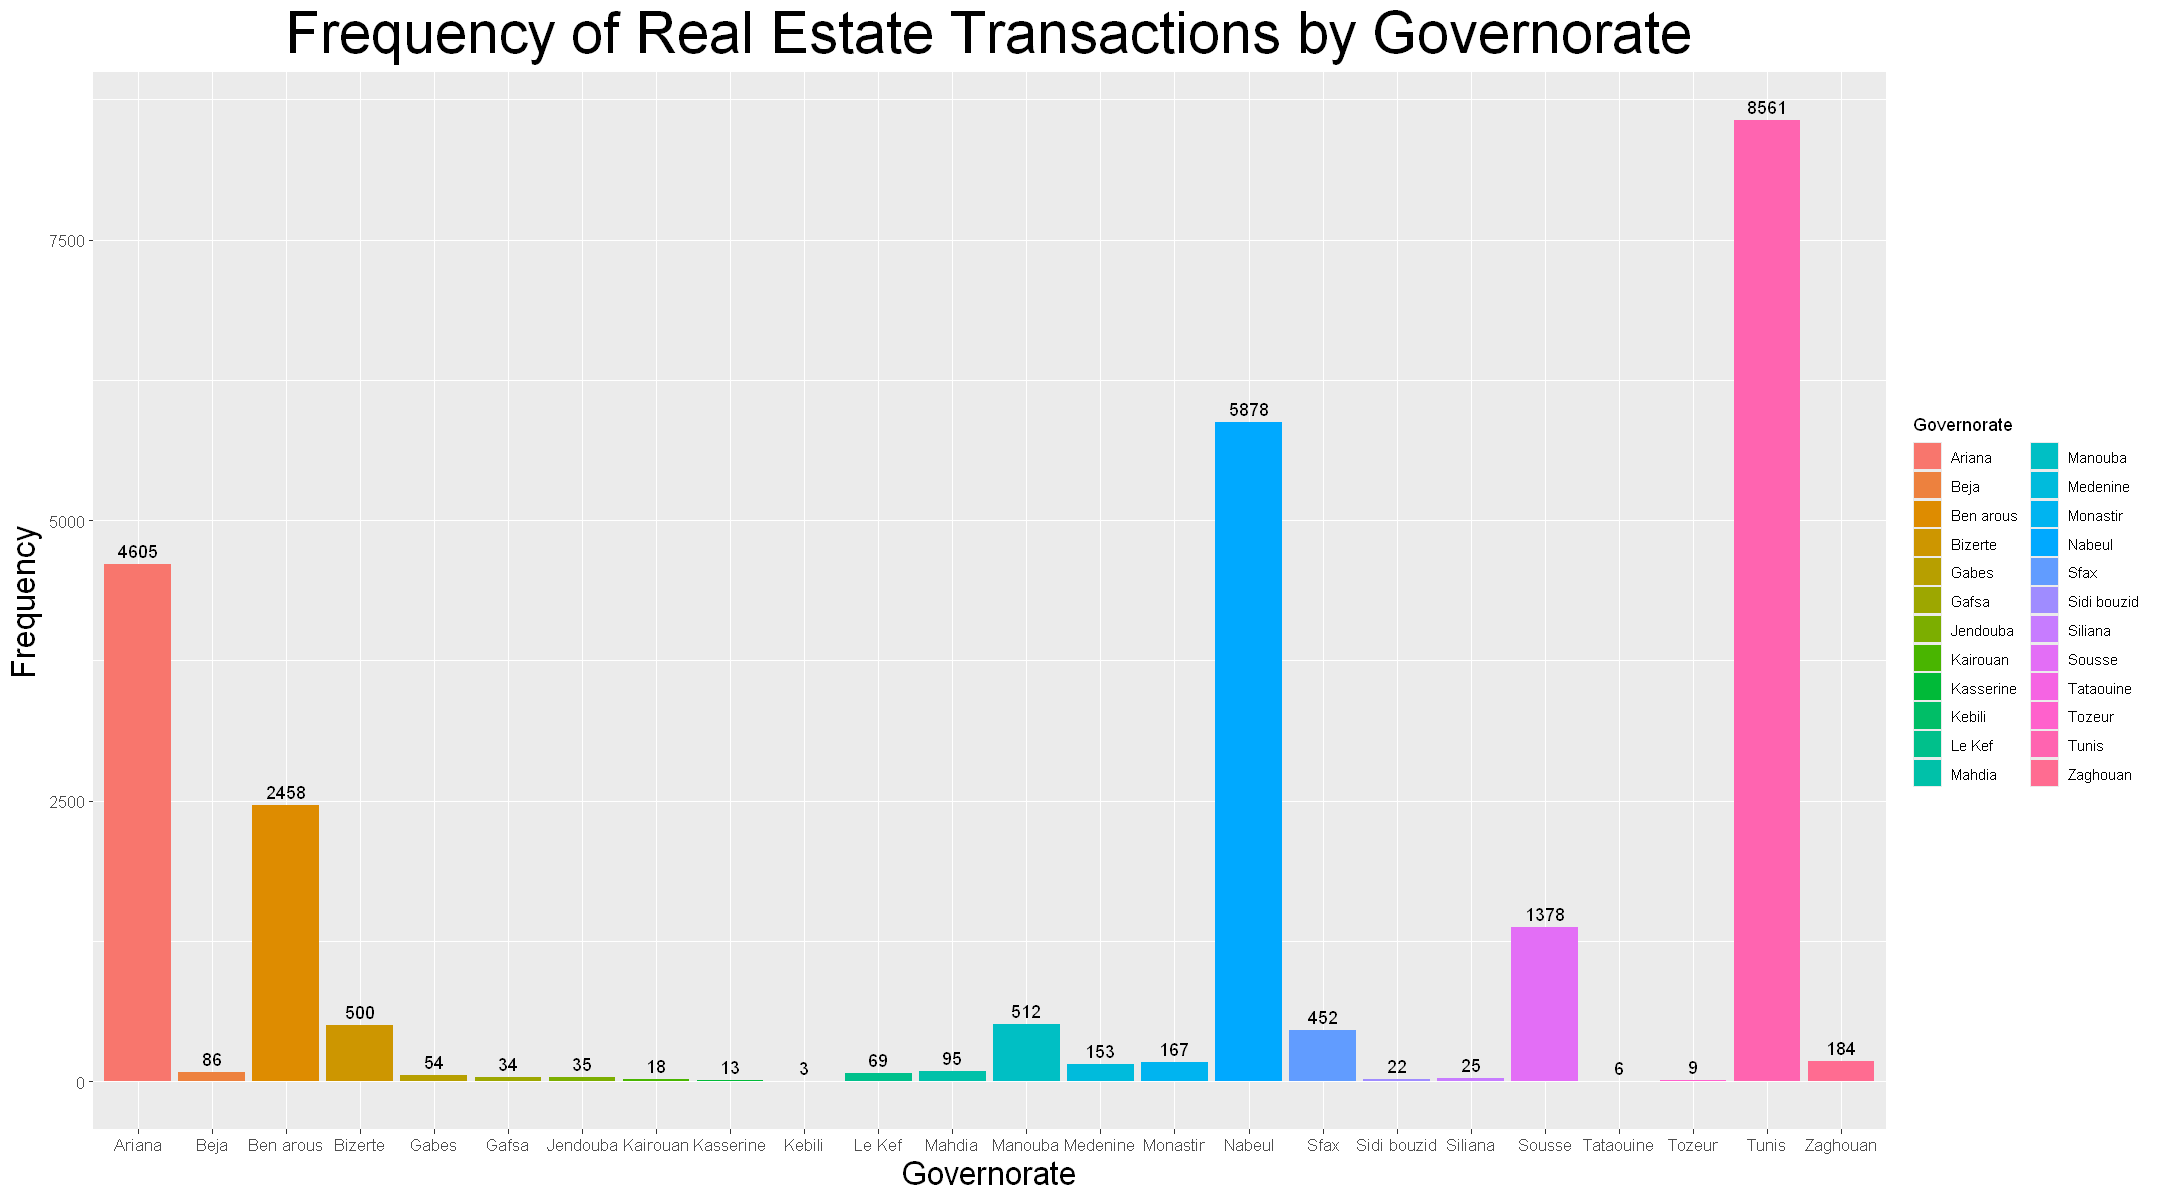

In [11]:
# Set the default size of plots
options(repr.plot.width=18, repr.plot.height=10)

# Bar plot for Governorate
plot_governorate <- ggplot(data, aes(x = Governorate, y = after_stat(count), fill = Governorate)) +
  geom_bar(stat = "count", width = 0.9) +
  geom_text(stat = 'count', aes(label = after_stat(count)), vjust = -0.5) +
  theme(axis.text.x = element_text(hjust = 0.5)) +
  ggtitle("Frequency of Real Estate Transactions by Governorate") +
  xlab("Governorate") +
  ylab("Frequency")+
  theme(axis.text = element_text(size = 10),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35,hjust = 0.5))

plot_governorate

# Save the bar plot for Governorate as an image
ggsave("plots/Frequency of Real Estate Transactions by Governorate.png", plot_governorate, width = 18, height = 10)

> Insights:
- from this plot, we can conclude that the most real estate transactions are done within these four governorates:
    - Tunis by 8561 Transactions.
    - Nabeul by 5876 Transactions.
    - Ariana by 4605 Transactions.
    - Ben Arous by 2458 Transactions.
> from now on, we will focus our analysis on **these four governorates**.

### Box Plot for Numerical Variable (Price) by Governorate:

Warning message:
"Removed 818 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 818 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


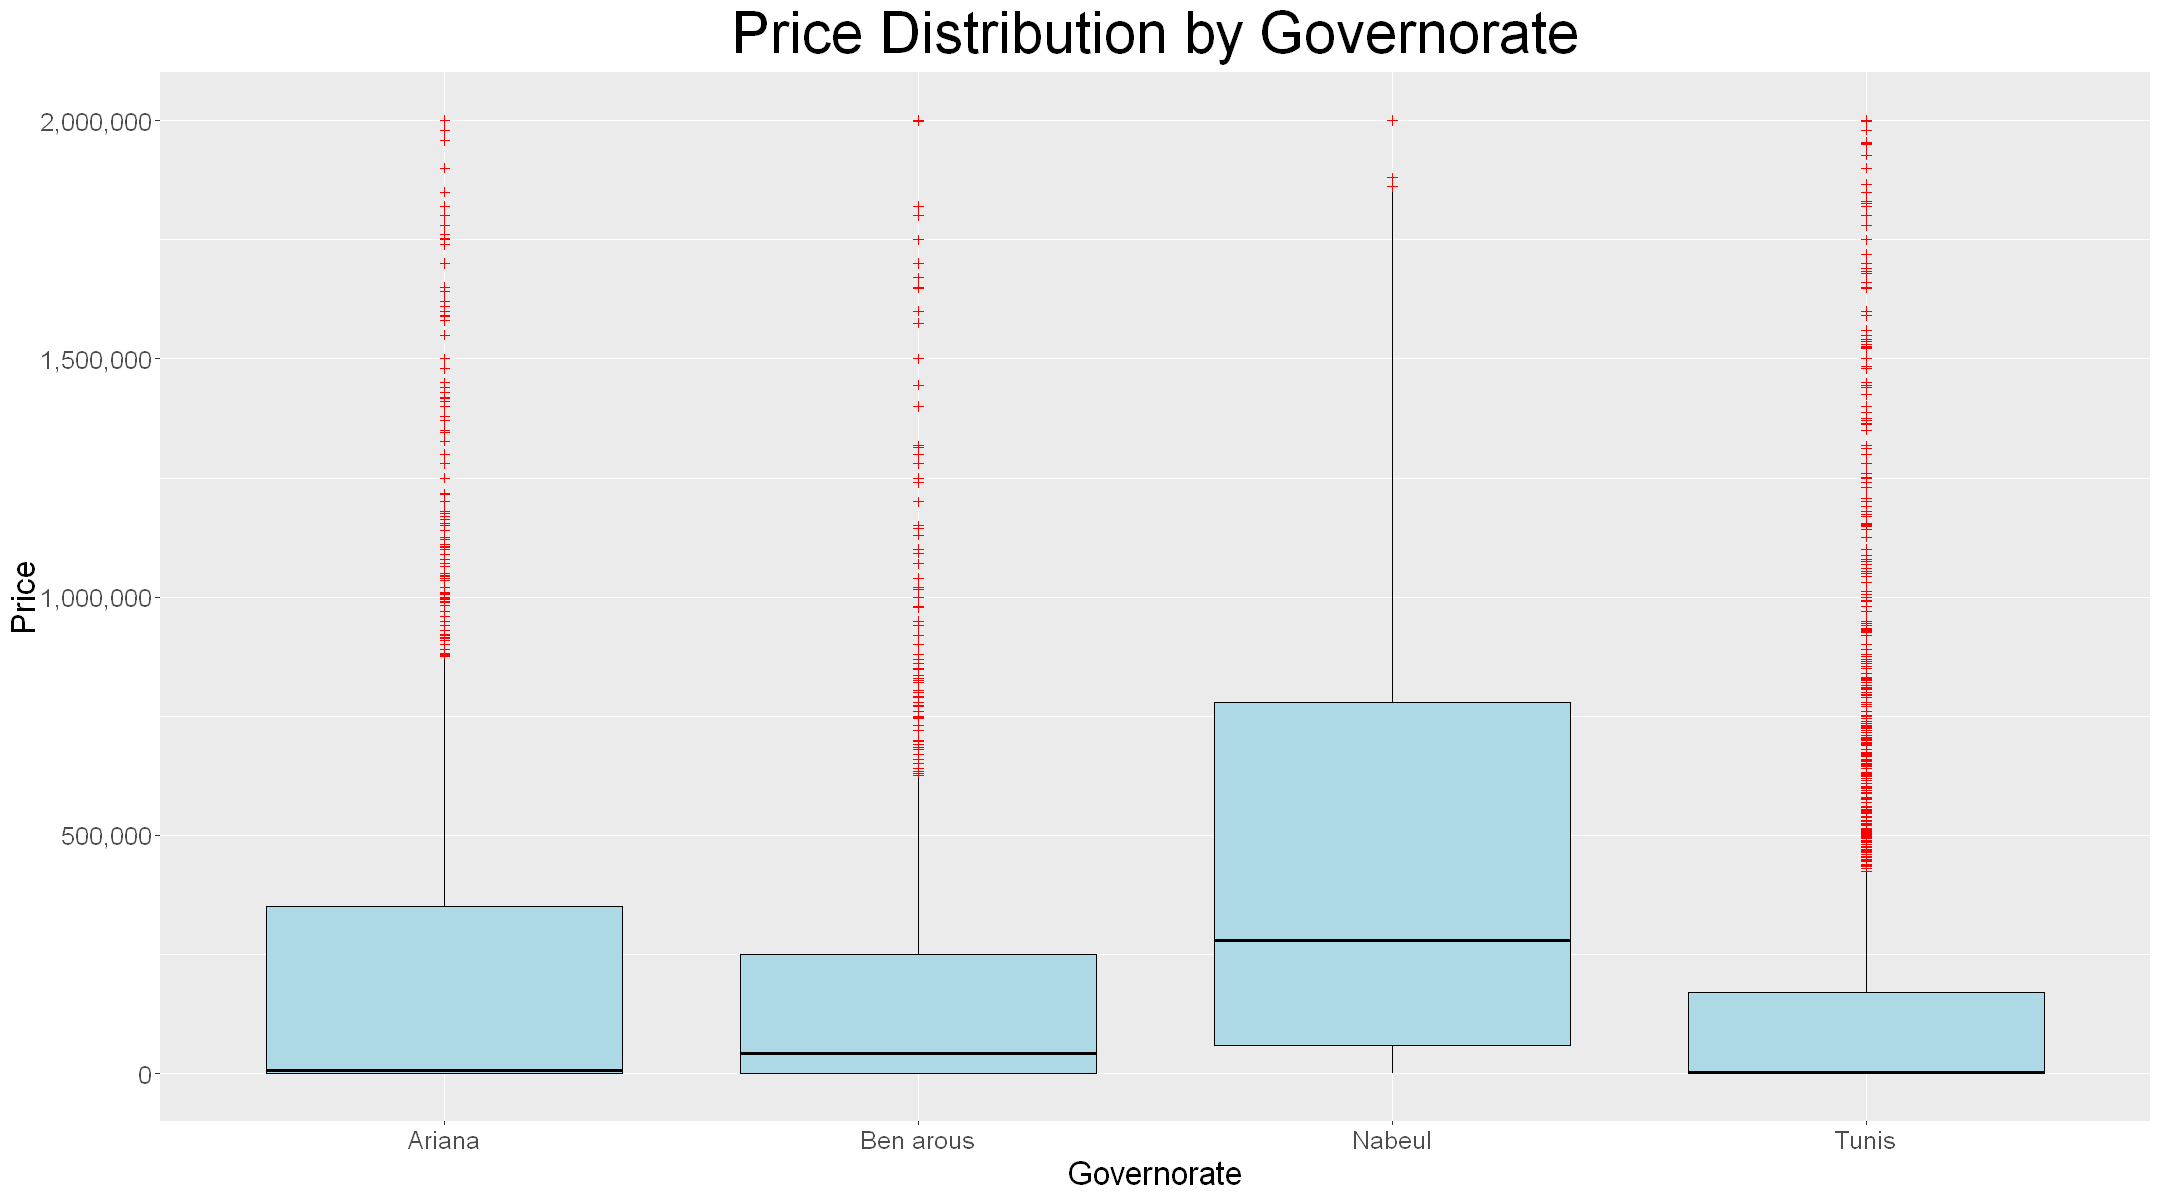

In [12]:
# making a subset for the mentioned governorates only
sub_set = subset(data, Governorate %in% c("Tunis", "Ben arous", "Nabeul", "Ariana"))

plot_price <- ggplot(sub_set, aes(x = Governorate, y = Price)) +
  geom_boxplot(outlier.shape = 3,  # Use a different shape for outliers
               outlier.color = "red",  # Use a different color for outliers
               fill = "lightblue",  # Use a different fill color for the boxes
               color = "black")+  # Use a different color for the box outlines
  ggtitle("Price Distribution by Governorate") +
  xlab("Governorate") +
  ylab("Price") +
  scale_y_continuous(labels = scales::comma, limits = c(0, 2000000)) +
  theme(axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35,hjust = 0.5))

plot_price

# Save the box plot with custom dimensions
ggsave("plots/box_plot_price_governorate.png",
plot_price,width = 18, height = 10)


> Insights:
- from this plot we can conclude some few things:
    - **Ariana and Ben Arous** : Both have similar price distributions with some outliers, indicating a stable property market.
    - **Nabeul** : Exhibits a higher median price with outliers, suggesting a more expensive property market with some very high-priced properties.
    - **Tunis** : Has a lower median price but many high-priced outliers, indicating a wide range of property prices.

### Filtering data only for the specified governorates:

In [13]:
# Filter data for only the specified Governorates
data_tunis <- subset(data, Governorate == "Tunis")
data_ariana <- subset(data, Governorate == "Ariana")
data_ben_arous <- subset(data, Governorate == "Ben arous")
data_nabeul <- subset(data, Governorate == "Nabeul")

> now we will start analysing each governorate seperatly

### The Governorate of Tunis:

#### Nature of real estates:

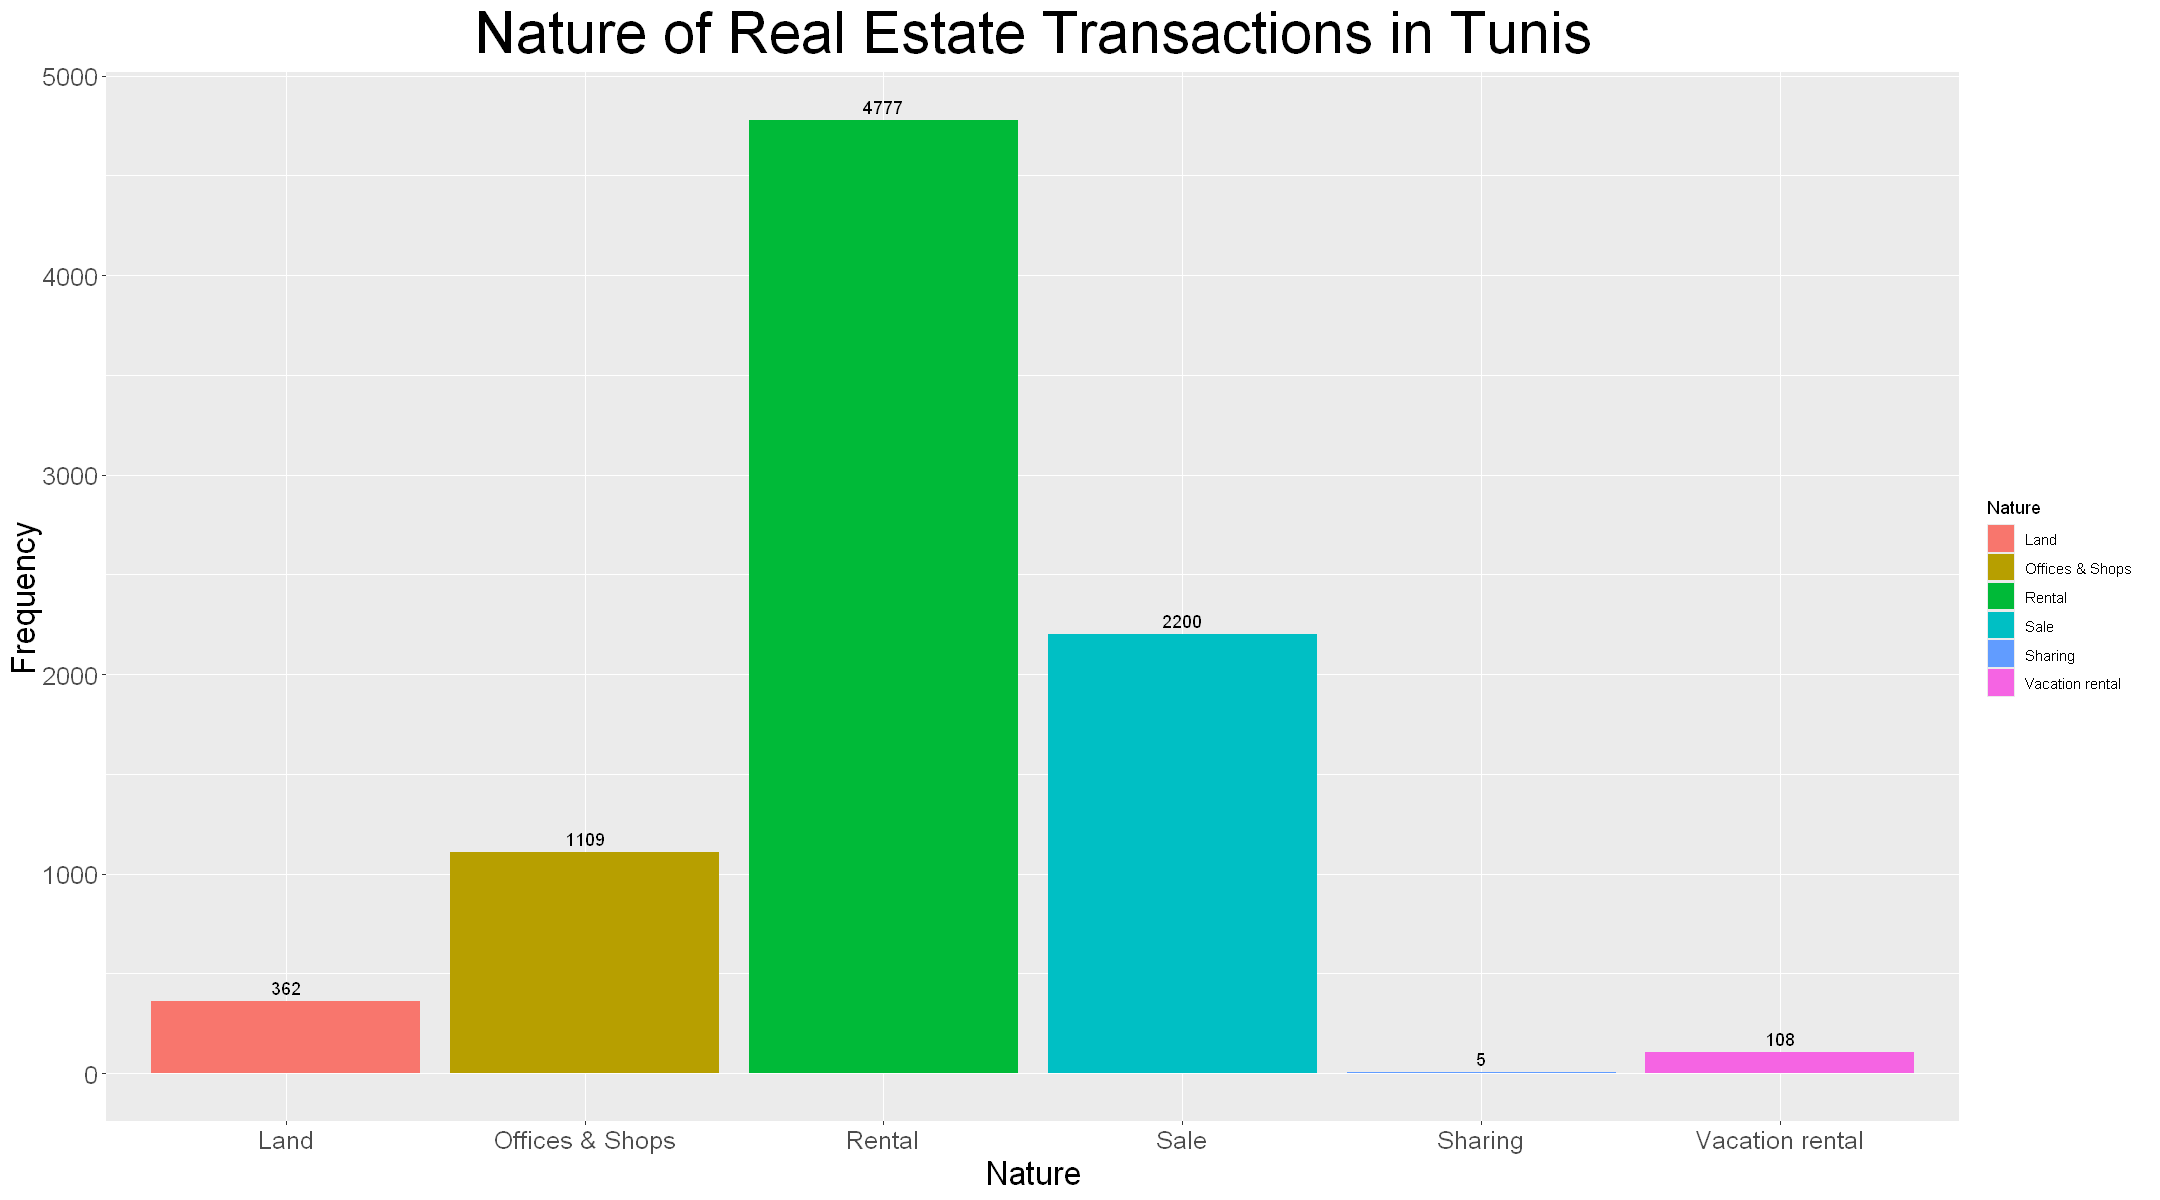

In [14]:
# Bar plot for Nature of Real Estate Transactions in Tunis
tunis_nature_plot <- ggplot(data_tunis, aes(x = Nature, fill = Nature)) +
  geom_bar(stat = "count", width = 0.9) +
  geom_text(stat = 'count', aes(label = after_stat(count)), vjust = -0.5) +
  ggtitle("Nature of Real Estate Transactions in Tunis") +
  xlab("Nature") +
  ylab("Frequency")+
  theme(axis.text.x = element_text(hjust = 0.5),
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35,hjust = 0.5))

tunis_nature_plot

# Save the bar plot for Nature of Real Estate Transactions in Tunis
ggsave("plots/Nature of Real Estate Transactions in Tunis.png", tunis_nature_plot, width = 18, height = 10)

> Insights:
- from this plot we can conclude that the **rental** Nature Control the most real estate Transactions in the Tunis Governorate by nearly 4,800 transactions , followed by **Sale** with 2,200 Transactions and **Offices & Shops** with 1109 Transactions. we can also notice the absence of the **Sharing** and **Vacation-rental** natures with less than 150 Transactions.

#### Types of real estates:

Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


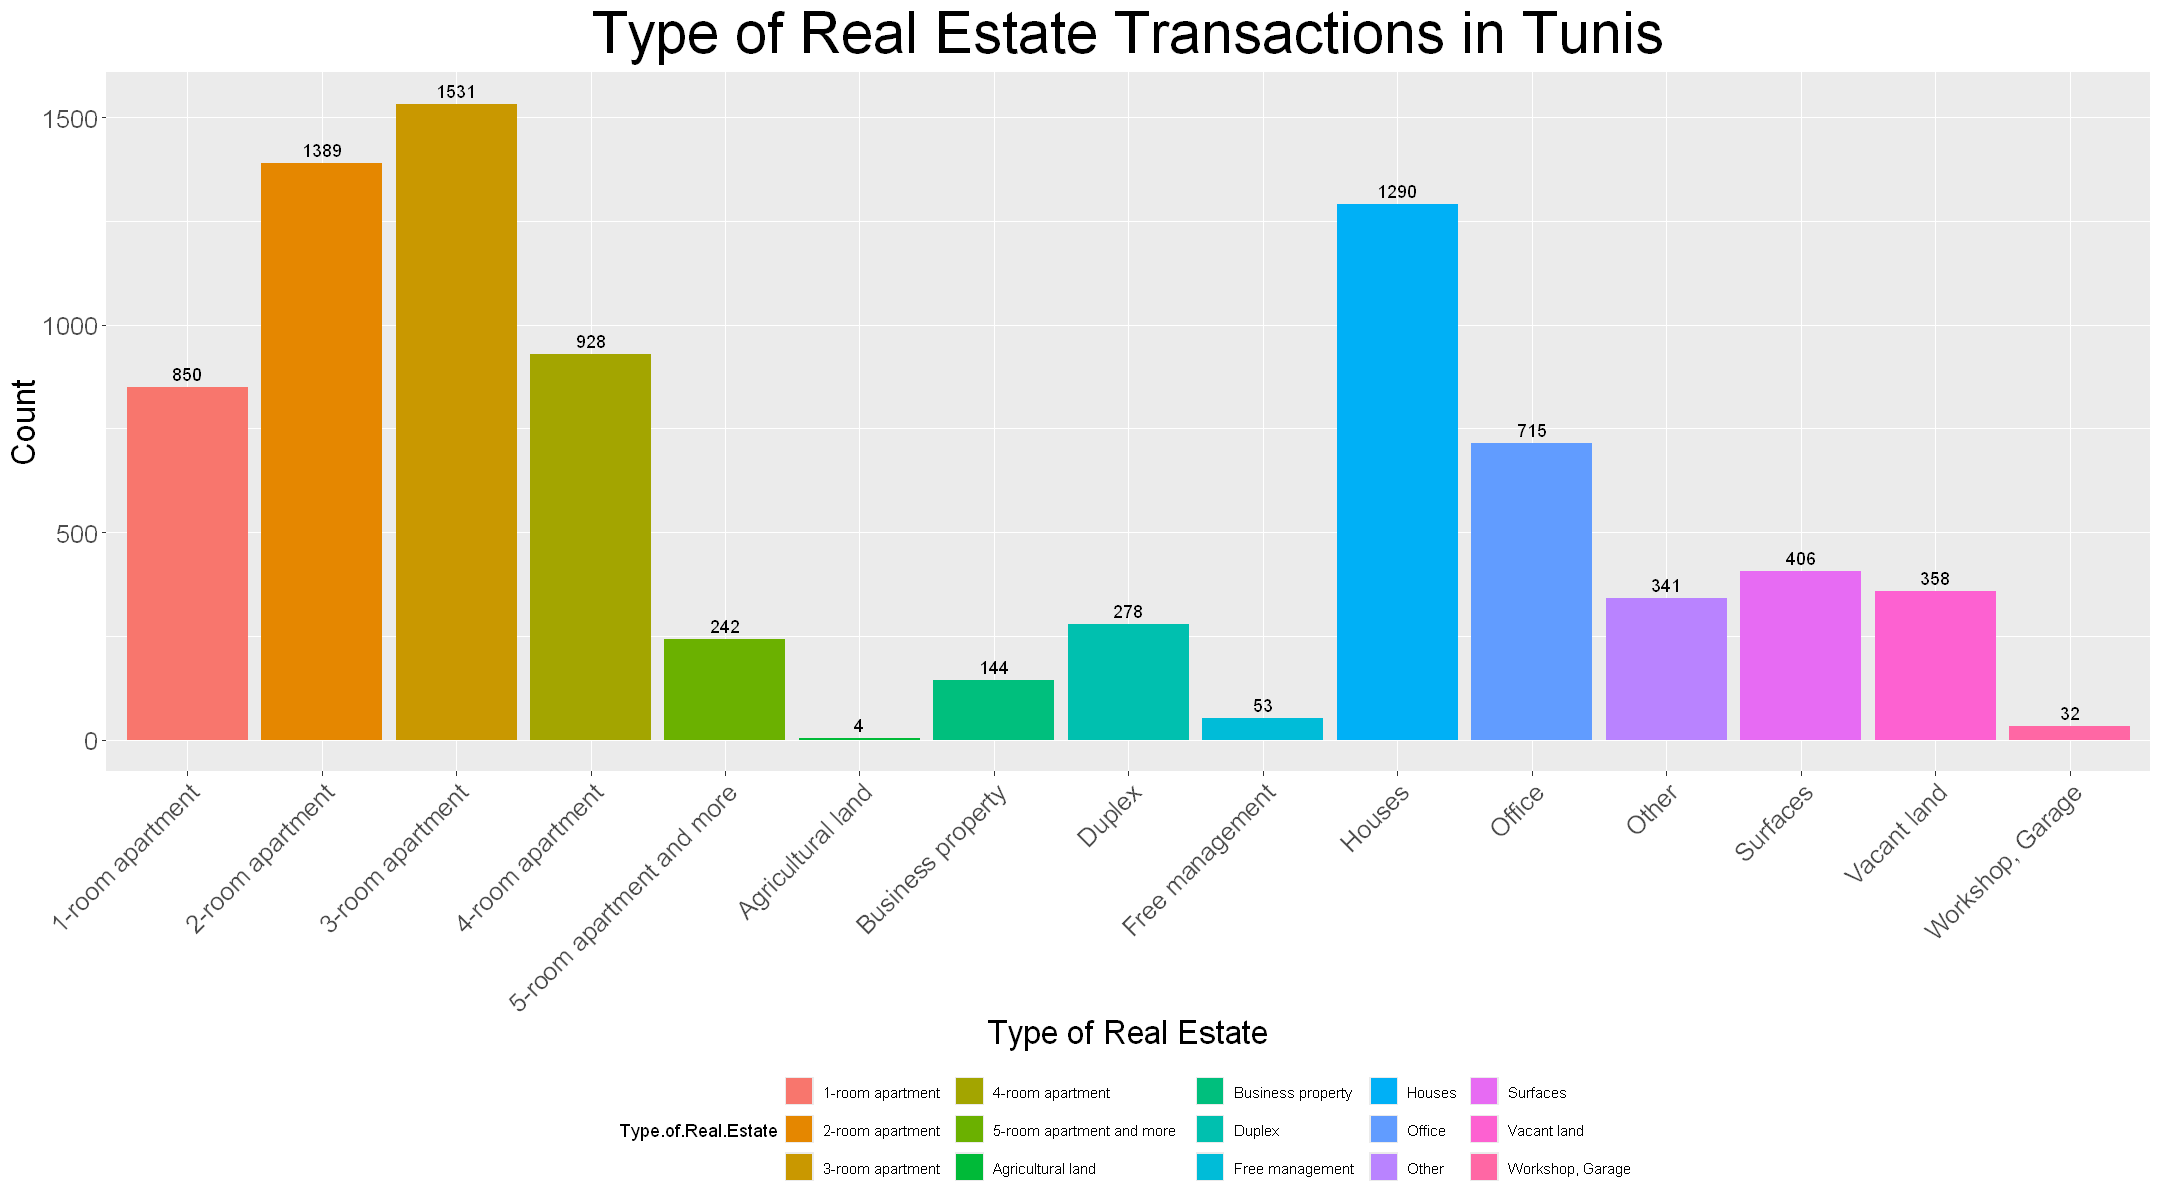

In [15]:
tunis_type_of_estate_bar_plot <- ggplot(data_tunis, aes(x = Type.of.Real.Estate, fill = Type.of.Real.Estate)) +
  geom_bar(stat = "count", width = 0.9) +
  geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5) +
  ggtitle("Type of Real Estate Transactions in Tunis") +
  xlab("Type of Real Estate") +
  ylab("Count") +
  theme(legend.position = "bottom",
        axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for better readability
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35, hjust = 0.5))

tunis_type_of_estate_bar_plot

# Save the bar plot for Type of Real Estate Transactions in Tunis
ggsave("plots/Type of Real Estate Transactions in Tunis.png", tunis_type_of_estate_bar_plot, width = 18, height = 10)

> Insights :
- from this plot we can see that the **appartement categorie** is the most common transaction type in the Tunis Governorate with a total of 4,940 transactions followed by **Houses** and **Office** with 1,290 and 716 transactions respectively. we can also find other types of transactions that are less common in this governorate with less than 450 transactions such as **Surfaces** , **Vacant land** , **Other** .

#### Mean prices of houses by delegation:

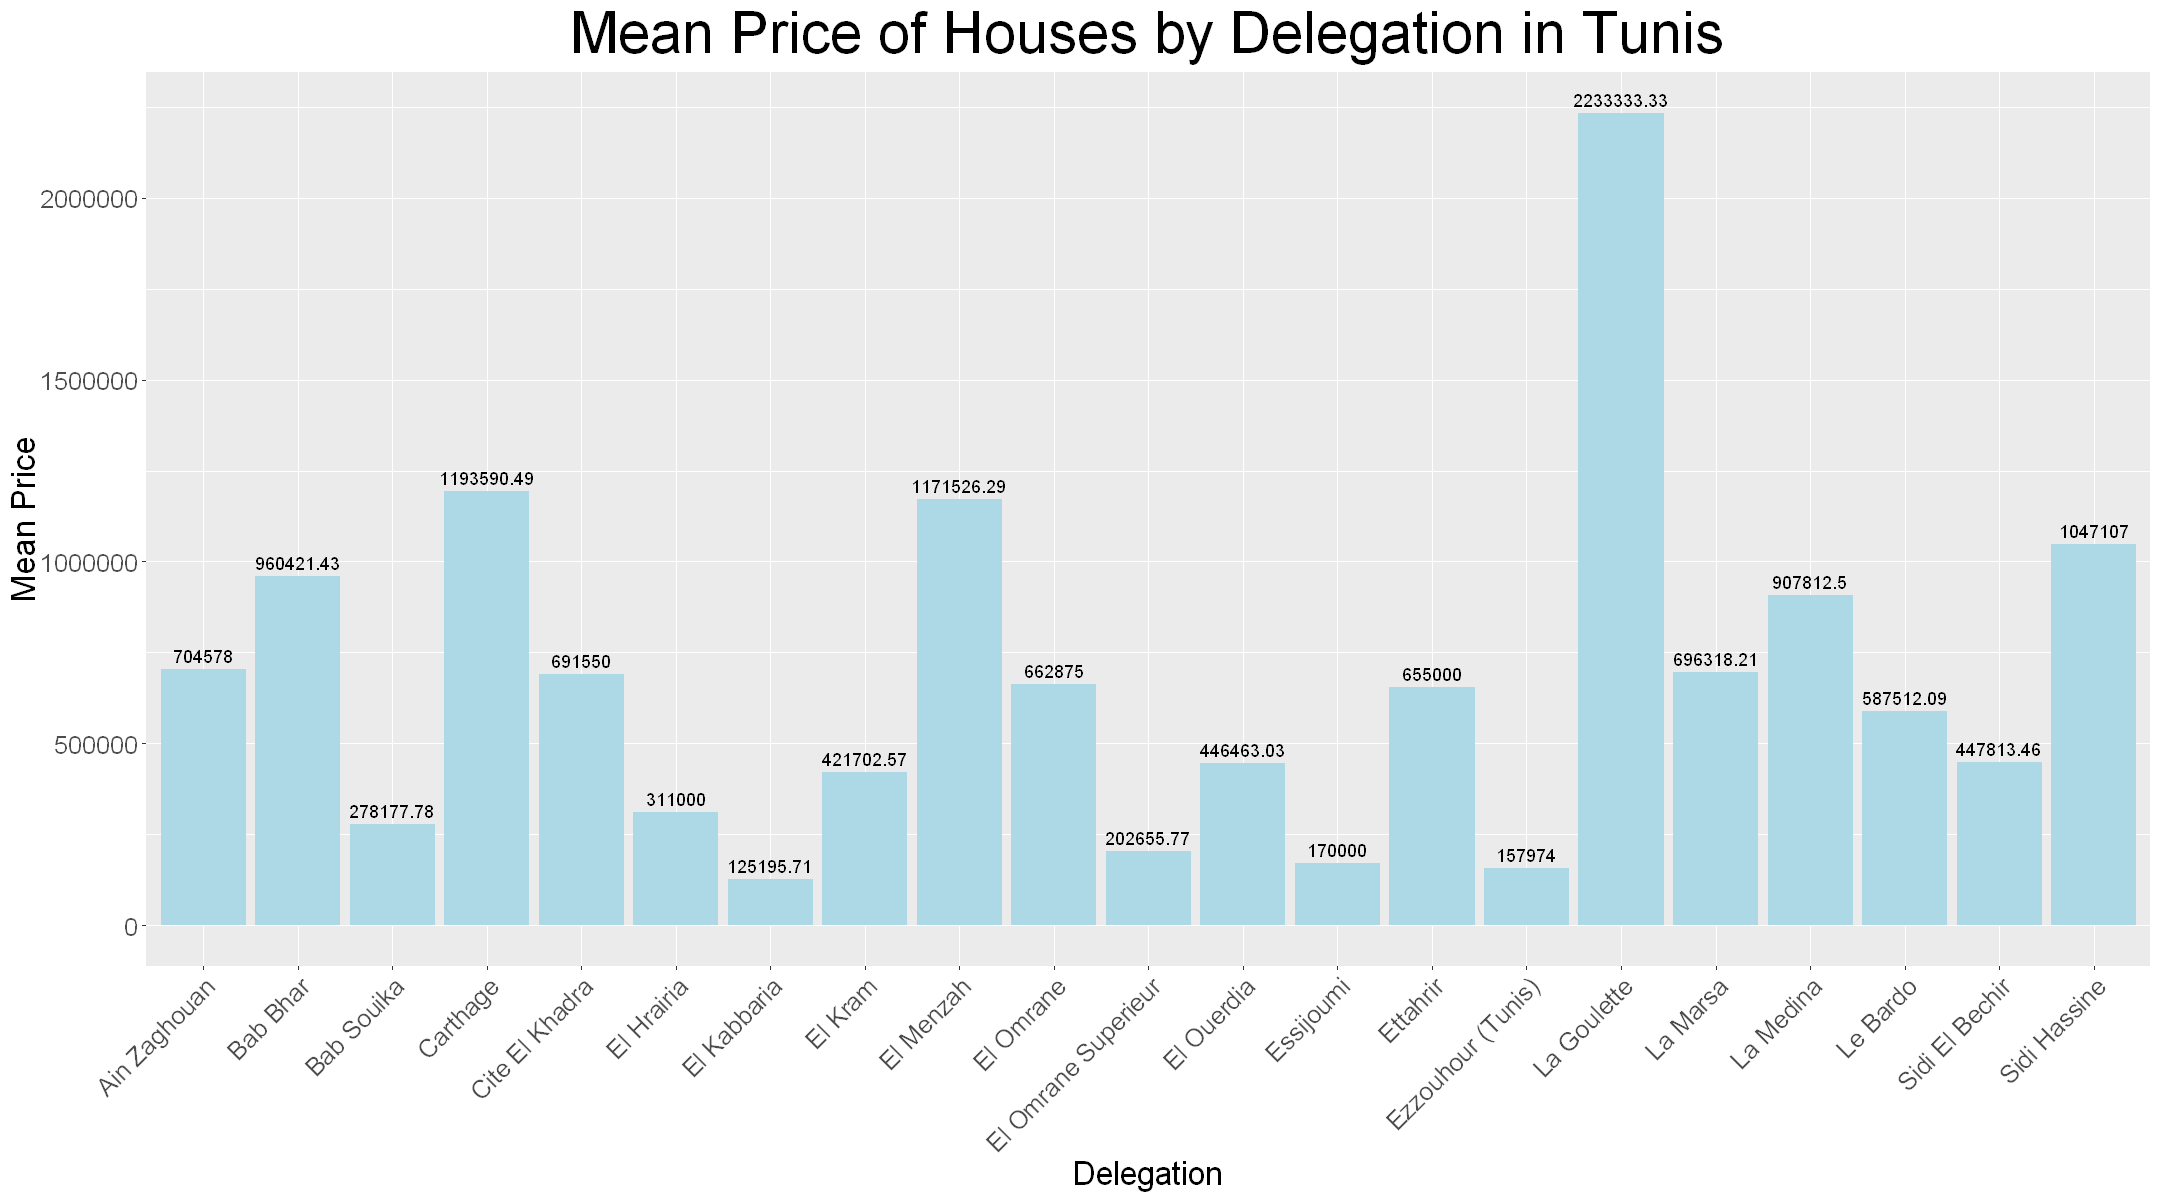

In [16]:
# Filter data for only "Houses" type of real estate
data_tunis_houses <- subset(data_tunis, Type.of.Real.Estate == "Houses")

# Calculate mean price by delegation for Houses only
tunis_mean_price_by_delegation_houses <- aggregate(Price ~ Delegation, data = data_tunis_houses, FUN = mean)
tunis_mean_price_by_delegation_houses <- tunis_mean_price_by_delegation_houses[order(tunis_mean_price_by_delegation_houses$Price, decreasing = TRUE), ]

# Create the bar plot for mean price by delegation for Houses only
tunis_mean_price_by_delegation_houses_bar_plot <- ggplot(tunis_mean_price_by_delegation_houses, aes(x = Delegation, y = Price)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  geom_text(aes(label = round(Price, 2)), vjust = -0.5) +
  ggtitle("Mean Price of Houses by Delegation in Tunis") +
  xlab("Delegation") +
  ylab("Mean Price") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for better readability
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35, hjust = 0.5))

tunis_mean_price_by_delegation_houses_bar_plot

# Save the bar plot for Mean Price of Real Estate Transactions by Delegation in Tunis
ggsave("plots/Mean Price of Real Estate Transactions by Delegation in Tunis.png", tunis_mean_price_by_delegation_houses_bar_plot, width = 18, height = 10)

> Insights:
- from this plot, we can conclude that the delegation of **La Goulette** have the highest priced houses with a mean of 2,233,333.33 TND followed by both **Carthage** and **El Menzah** with a mean price respectivily of 1,193,590.49 TND and 1,171,526.29 TND. we can also notice some delegations that have a price mean close to 1,000,000 TND like **La Medina**,**Sidi Hassine** and **BAB Bhar**, and at the bottom we have **El Kabbaria**,**Essijoumi** and **Ezzouhour** with a price mean that doesn't surpass 200,000 TND.

### The Governorate of Nabeul:

#### Nature of real estates:

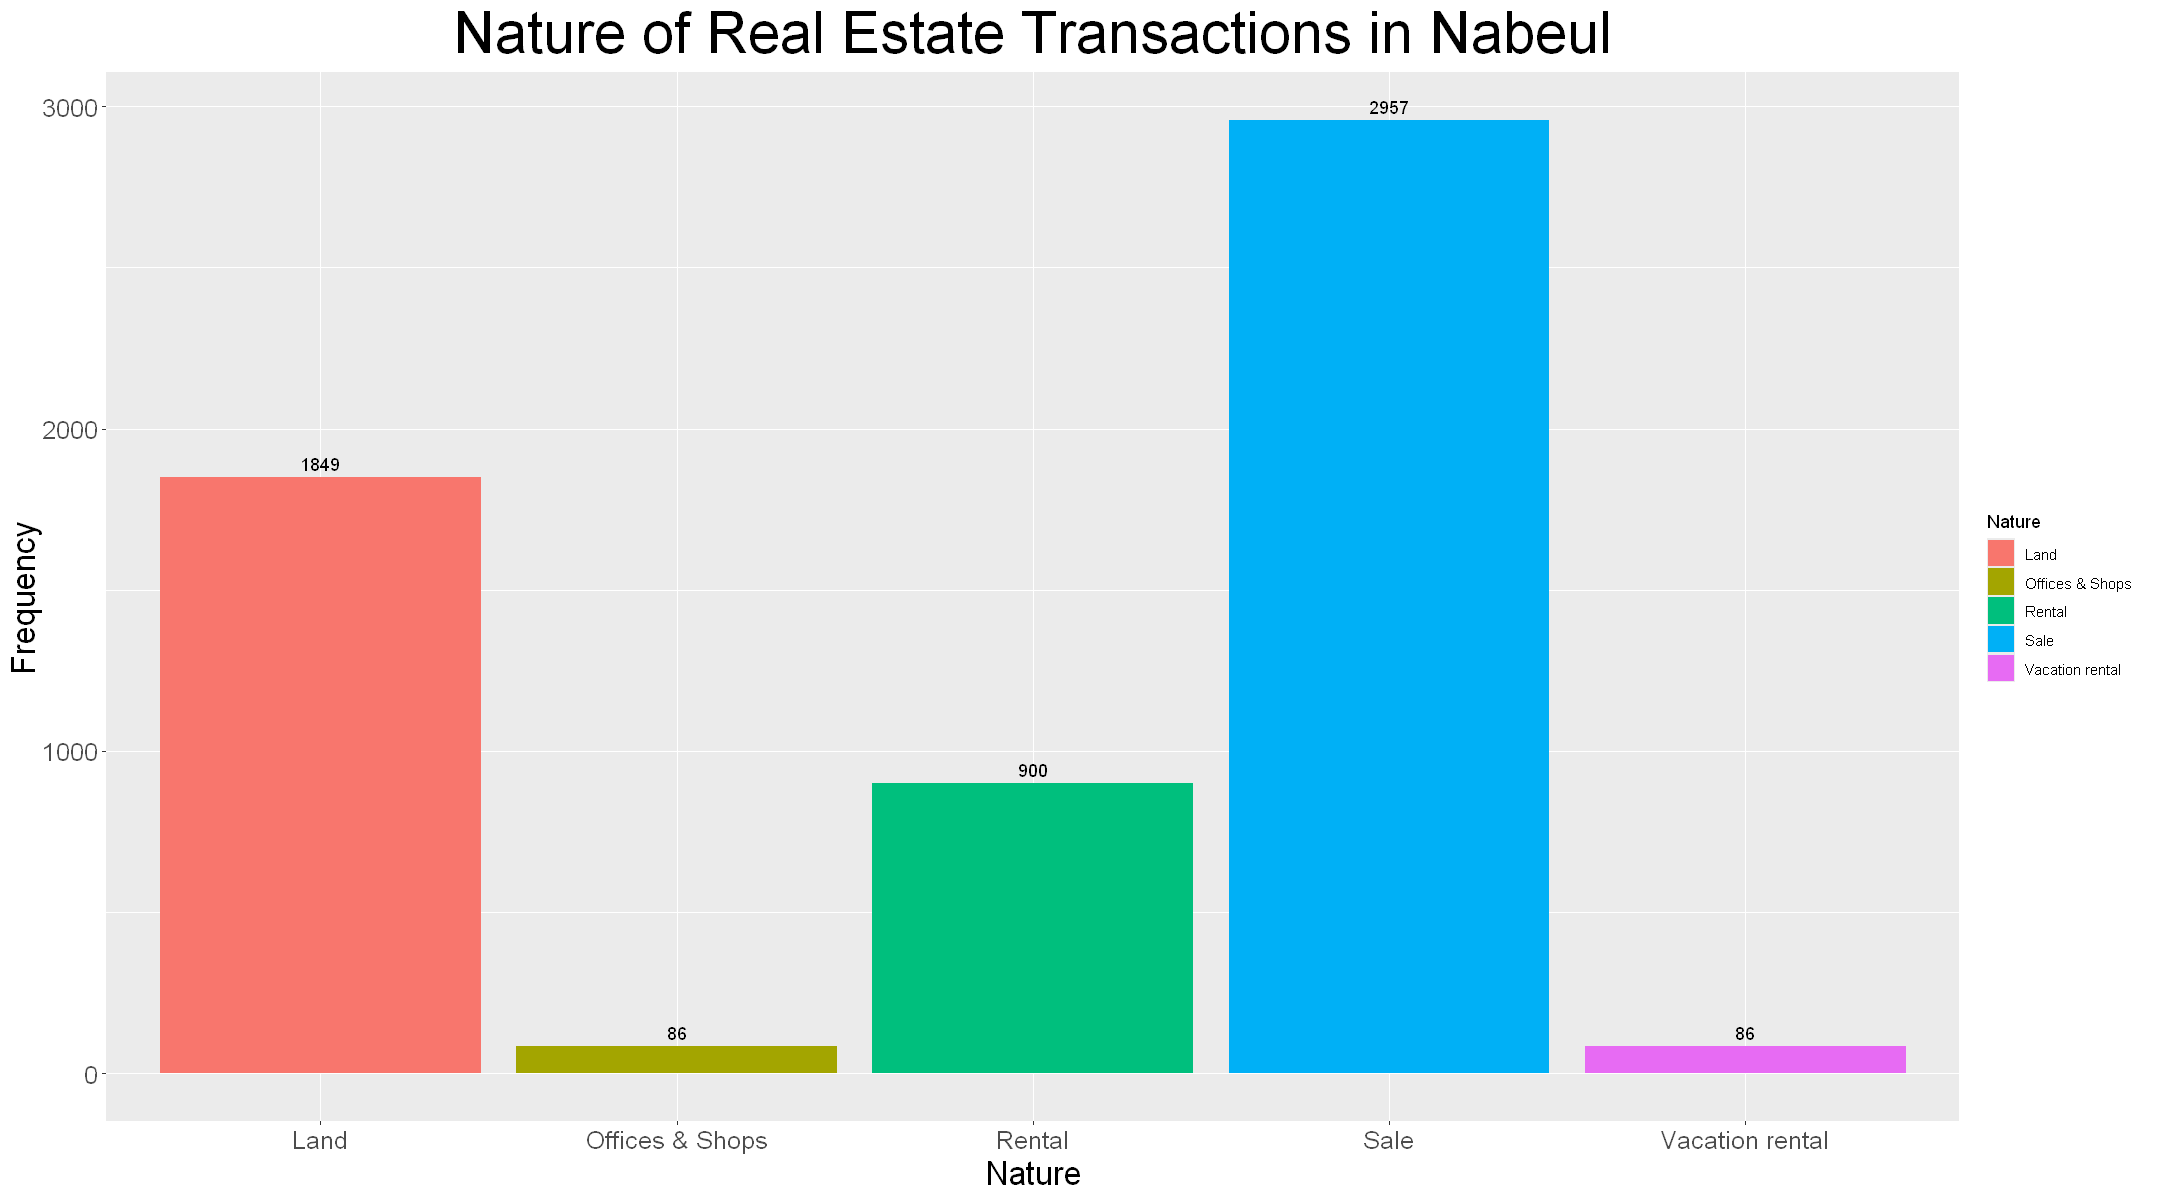

In [17]:
# Bar plot for Nature of Real Estate Transactions in Nabeul
nabeul_nature_plot <- ggplot(data_nabeul, aes(x = Nature, fill = Nature)) +
    geom_bar(stat = "count", width = 0.9) +
    geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5) +
    ggtitle("Nature of Real Estate Transactions in Nabeul") +
    xlab("Nature") +
    ylab("Frequency")+
    theme(axis.text.x = element_text(hjust = 0.5),
                axis.text = element_text(size = 15),
                axis.title = element_text(size = 20),
                plot.title = element_text(size = 35,hjust = 0.5))

nabeul_nature_plot

# Save the bar plot for Nature of Real Estate Transactions in Nabeul
ggsave("plots/Nature of Real Estate Transactions in Nabeul.png", nabeul_nature_plot, width = 18, height = 10)

> Insights :
from this plot , we can see that the **sale** nature control the majority of transactions in Nabeul with nearly 3000 Transactions. followed by the **Land** with 1849 transactions and the **Rental** Nature with 900 transactions, while the **Vacation rental** and **Offices & Shops** doesn't surpass 100 Transactions.


#### Types of real estates:

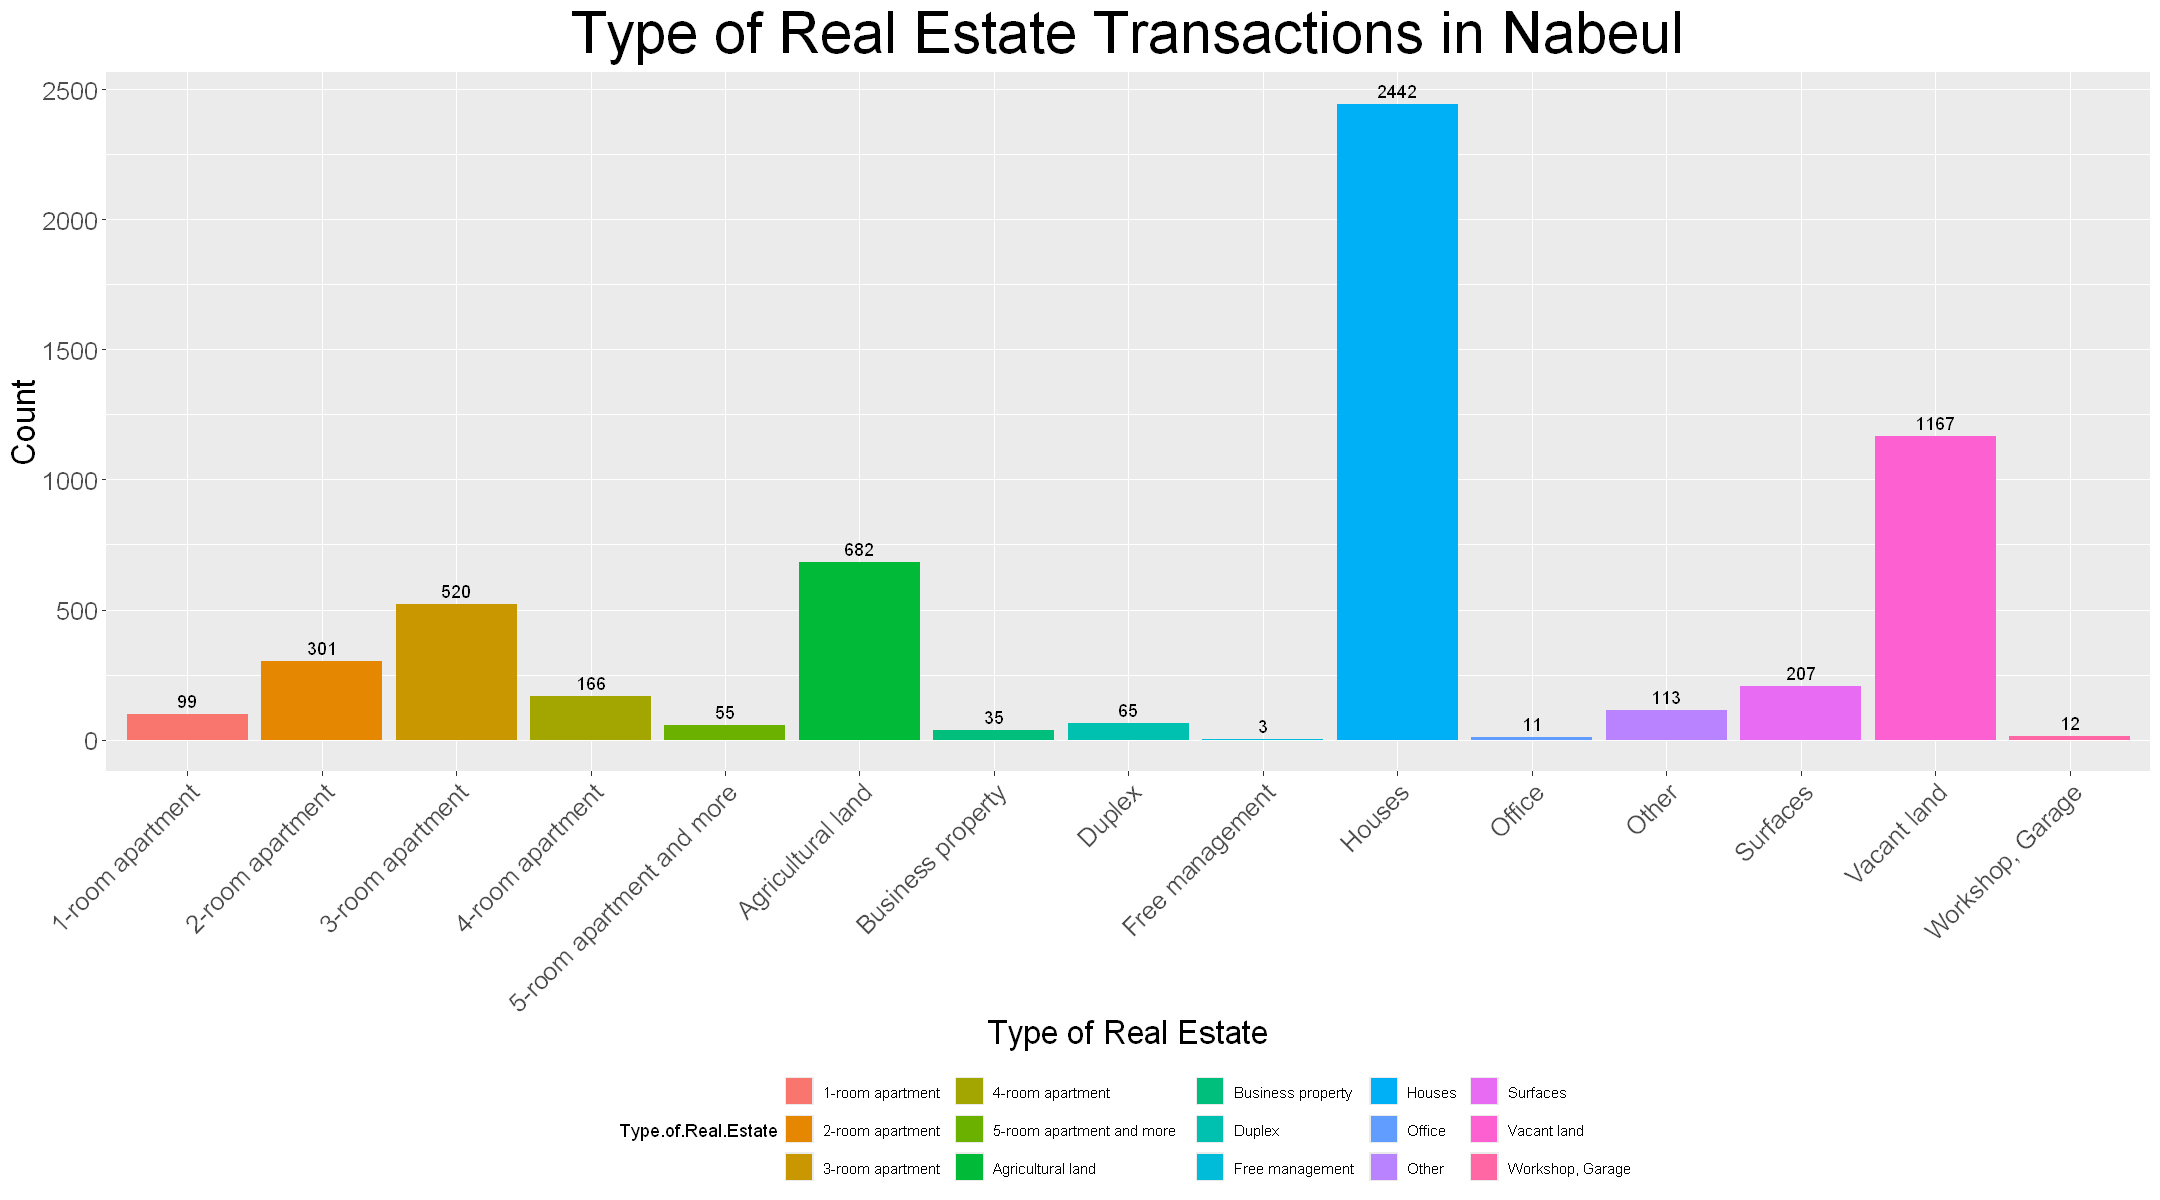

In [18]:
nabeul_type_of_estate_bar_plot <- ggplot(data_nabeul, aes(x = Type.of.Real.Estate, fill = Type.of.Real.Estate)) +
  geom_bar(stat = "count", width = 0.9) +
  geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5) +
  ggtitle("Type of Real Estate Transactions in Nabeul") +
  xlab("Type of Real Estate") +
  ylab("Count") +
  theme(legend.position = "bottom",
        axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for better readability
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35, hjust = 0.5))

nabeul_type_of_estate_bar_plot
ggsave("plots/Type of Real Estate Transactions in Nabeul.png", nabeul_type_of_estate_bar_plot, width = 18, height = 10)

>Insights :
- from this plot , we can assume that the most common Type of real estate transactions in Nabeul governorate are the **houses** with a whopping 2442 Transactions, followed by **vacant land** with 1167 transactions and **Agricultural land** with 682 transactions.

#### Mean prices of houses by delegation:

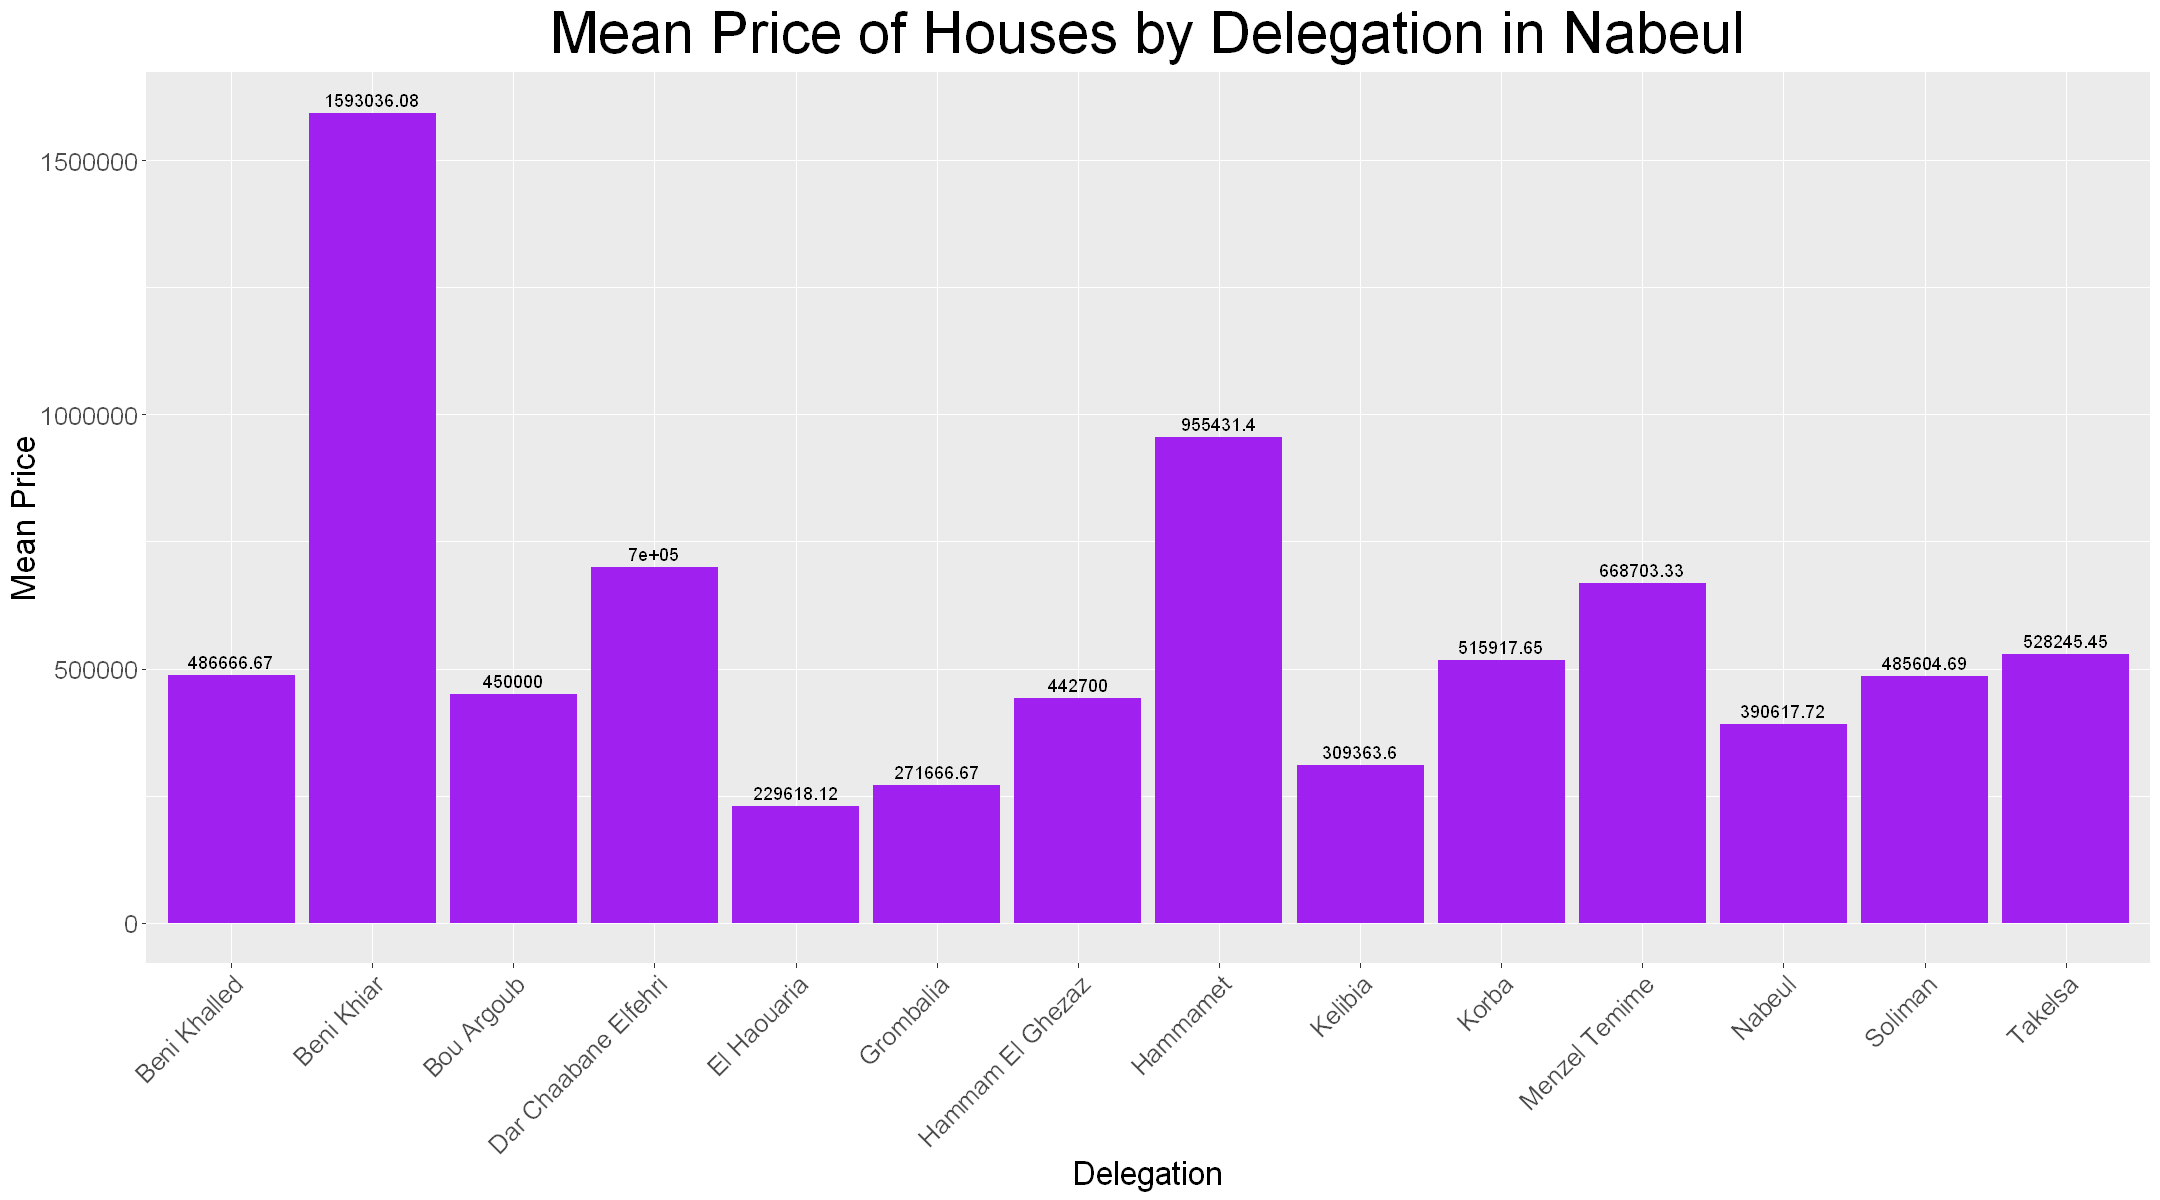

In [19]:
data_nabeul_houses <- subset(data_nabeul, Type.of.Real.Estate == "Houses")
nabeul_mean_price_by_delegation_houses <- aggregate(Price ~ Delegation, data = data_nabeul_houses, FUN = mean)
nabeul_mean_price_by_delegation_houses <- nabeul_mean_price_by_delegation_houses[order(nabeul_mean_price_by_delegation_houses$Price, decreasing = TRUE), ]
nabeul_mean_price_by_delegation_houses_bar_plot <- ggplot(nabeul_mean_price_by_delegation_houses, aes(x = Delegation, y = Price)) +
  geom_bar(stat = "identity", fill = "purple") +
  geom_text(aes(label = round(Price, 2)), vjust = -0.5) +
  ggtitle("Mean Price of Houses by Delegation in Nabeul") +
  xlab("Delegation") +
  ylab("Mean Price") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for better readability
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35, hjust = 0.5))

nabeul_mean_price_by_delegation_houses_bar_plot
ggsave("plots/Mean Price of Real Estate Transactions by Delegation in Nabeul.png", nabeul_mean_price_by_delegation_houses_bar_plot, width = 18, height = 10)

>Insights :
- we can see here that the delegation of **Beni Khiar** has the highest priced of houses with a mean of 1,593,036.08 TND ,followed by **Hammamet** with a mean of nearly 1,000,000 TND,then we can notice some delegation with a mean price of houses that reach 750,000 TND like **Dar Chaabane Elfehri** and **Manzel Temime**. and at the bottom we have **El Haouaria** and **Grombalia** with a price mean that doesn't surpass 300,000 TND.

### The Governorate of Ariana:

#### Nature of real estates:

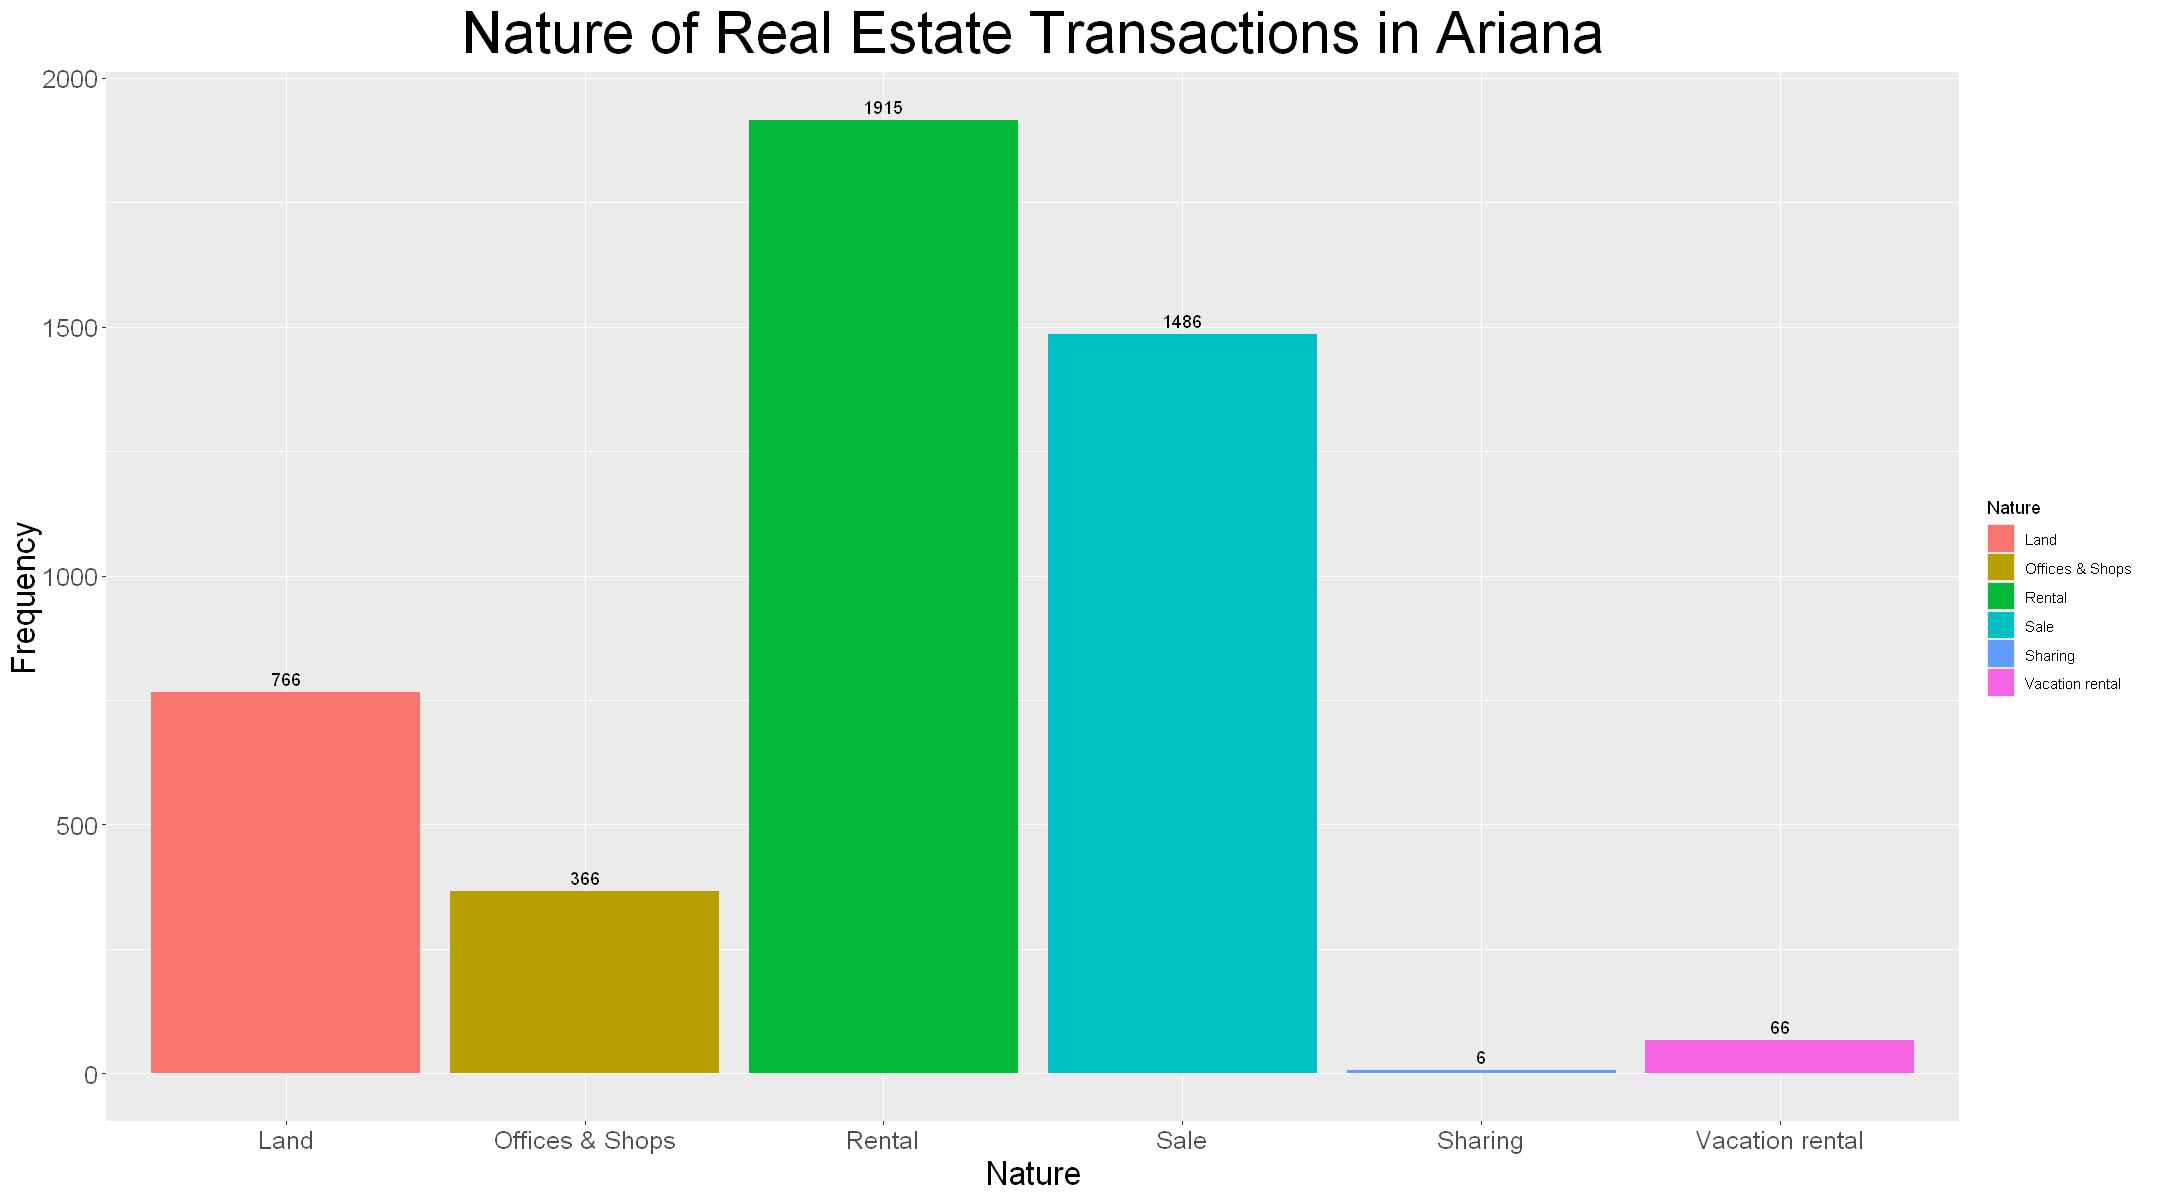

In [20]:
# Bar plot for Nature of Real Estate Transactions in Ariana
ariana_nature_plot <- ggplot(data_ariana, aes(x = Nature, fill = Nature)) +
    geom_bar(stat = "count", width = 0.9) +
    geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5) +
    ggtitle("Nature of Real Estate Transactions in Ariana") +
    xlab("Nature") +
    ylab("Frequency")+
    theme(axis.text.x = element_text(hjust = 0.5),
                axis.text = element_text(size = 15),
                axis.title = element_text(size = 20),
                plot.title = element_text(size = 35,hjust = 0.5))

ariana_nature_plot

# Save the bar plot for Nature of Real Estate Transactions in Ariana
ggsave("plots/Nature of Real Estate Transactions in Ariana.png", ariana_nature_plot, width = 18, height = 10)

>Insights :
- Like tunis governorate , the **rental** are the most common Nature of real estate transactions in Ariana with nearly 2,000 transactions , followed by the **Sale** with 1486 transactions and the **Land** nature with 766 transactions. we can also notice the absence of the **Sharing** and **Vacation rental** natures.

#### Types of real estates:

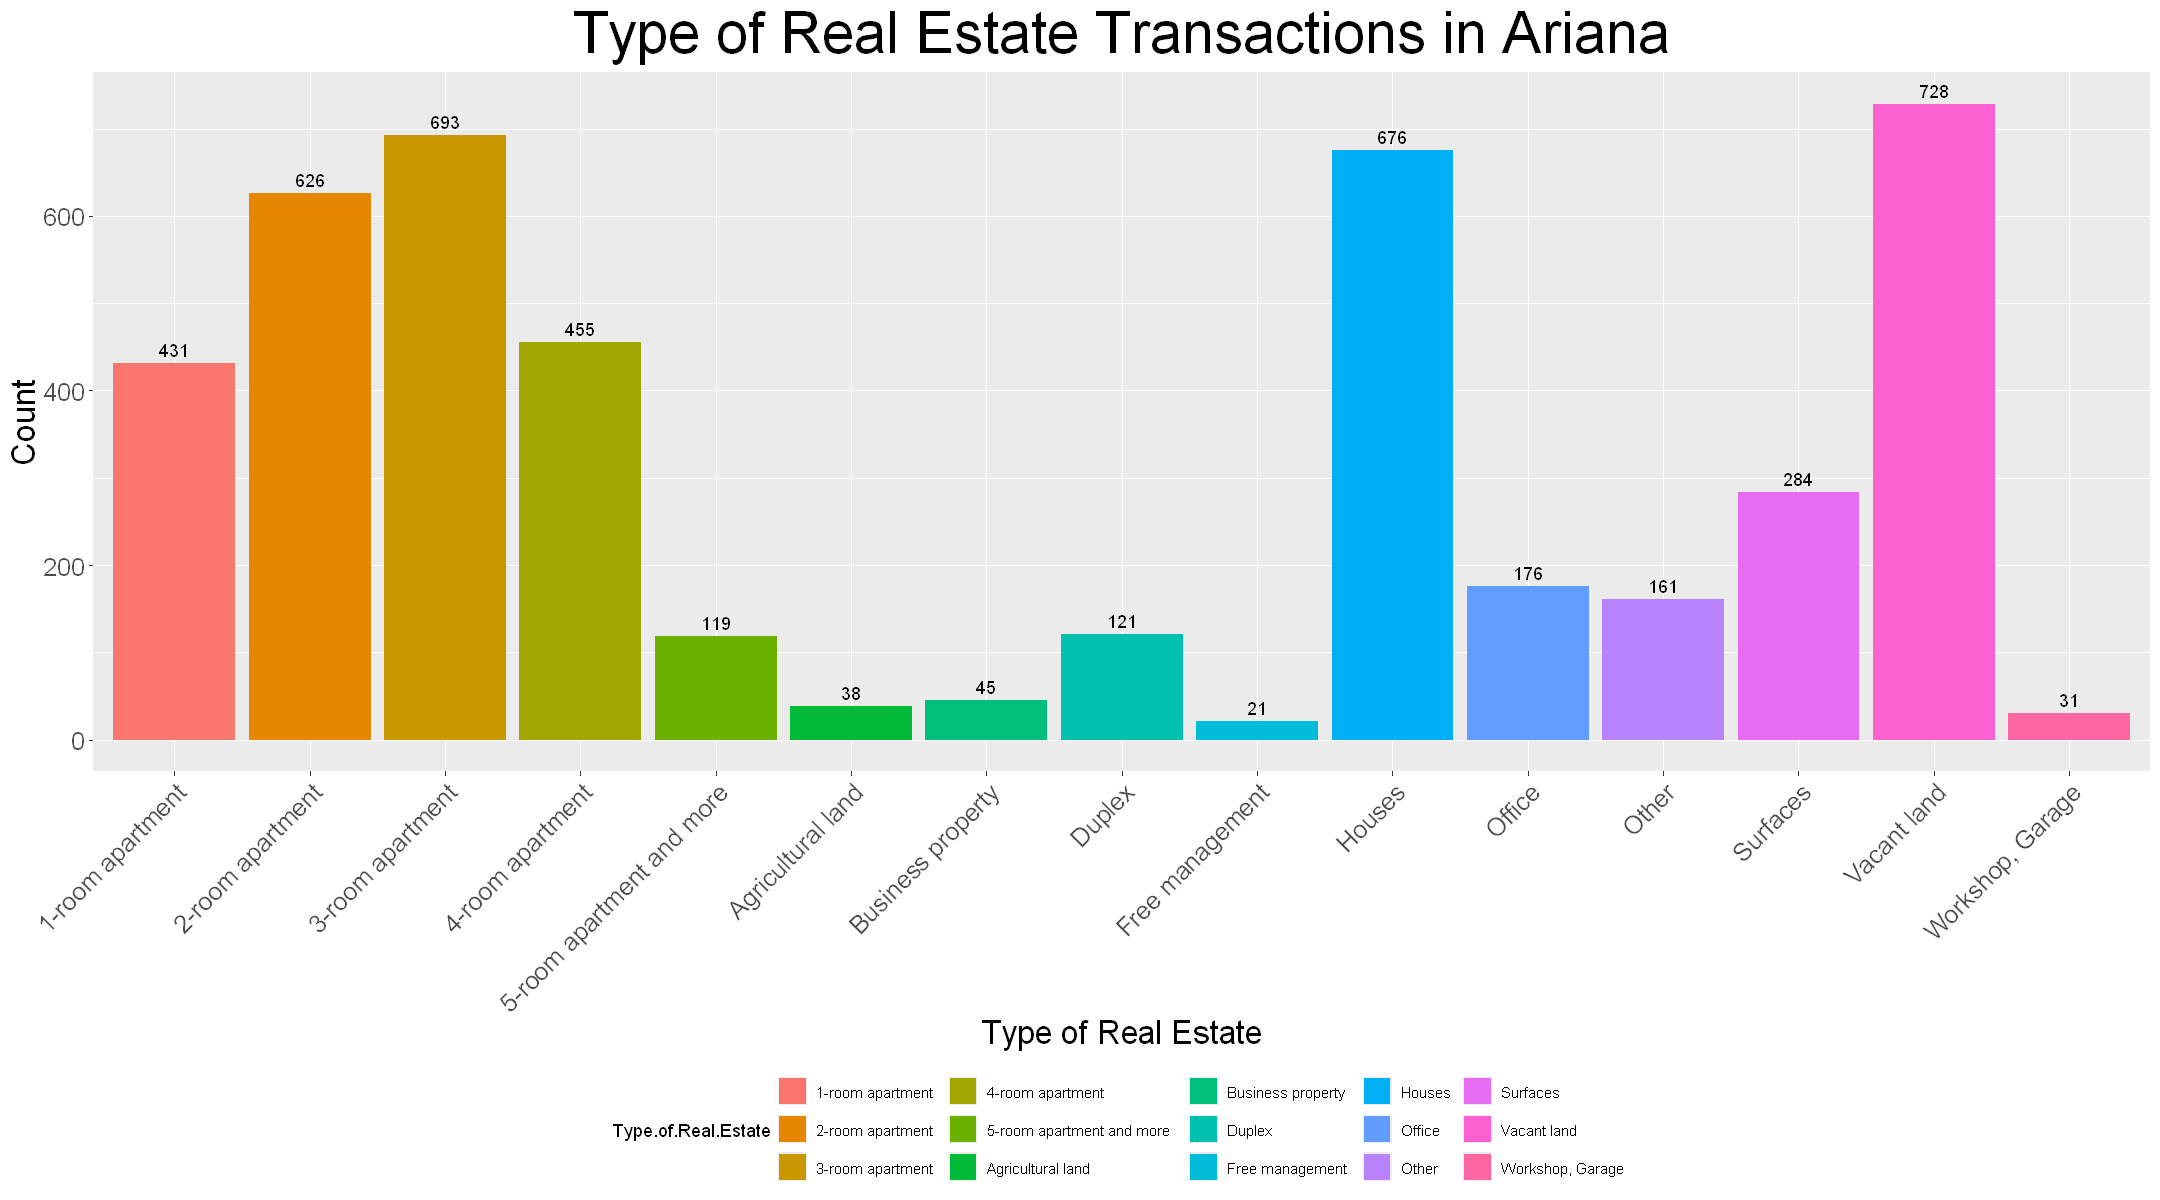

In [21]:
ariana_type_of_estate_bar_plot <- ggplot(data_ariana, aes(x = Type.of.Real.Estate, fill = Type.of.Real.Estate)) +
  geom_bar(stat = "count", width = 0.9) +
  geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5) +
  ggtitle("Type of Real Estate Transactions in Ariana") +
  xlab("Type of Real Estate") +
  ylab("Count") +
  theme(legend.position = "bottom",
        axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for better readability
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35, hjust = 0.5))

ariana_type_of_estate_bar_plot
ggsave("plots/Type of Real Estate Transactions in Ariana.png", ariana_type_of_estate_bar_plot, width = 18, height = 10)


> Insights:
- Unlike the above governorates , the **vacant land** is the most common type of real estates in ariana governorate with 730 transactions , we also have the **houses** and **appartment** that have nearly 700 transactions. and at the bottom we have **Argricultural land**, **Business property** , **Free management** and **Workshop Garage** for which none of them surpass 50 transactions.

#### Mean Prices of houses by delegation:

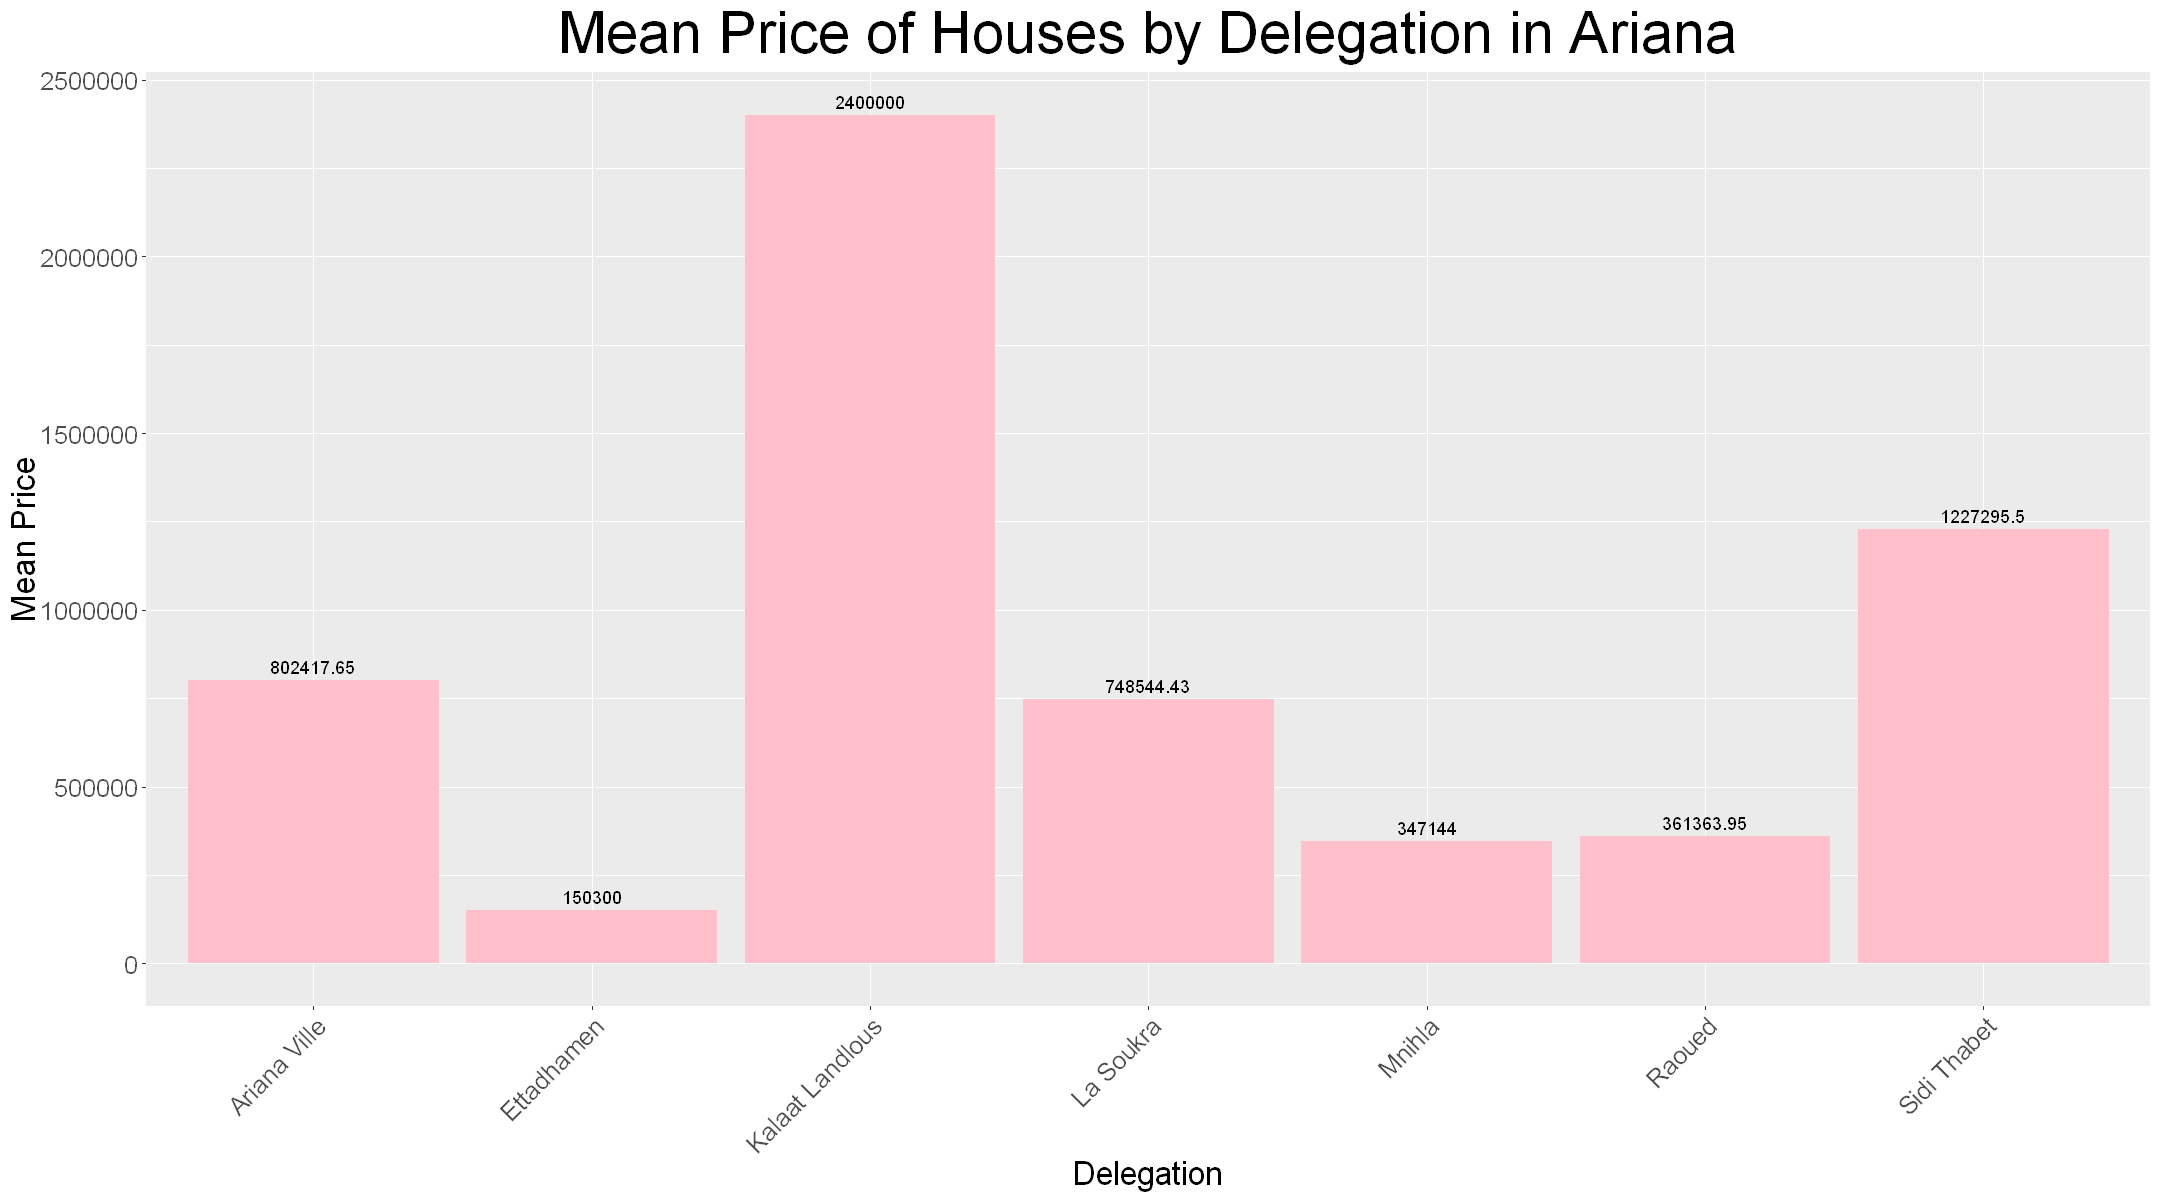

In [22]:
data_ariana_houses <- subset(data_ariana, Type.of.Real.Estate == "Houses")
ariana_mean_price_by_delegation_houses <- aggregate(Price ~ Delegation, data = data_ariana_houses, FUN = mean)
ariana_mean_price_by_delegation_houses <- ariana_mean_price_by_delegation_houses[order(ariana_mean_price_by_delegation_houses$Price, decreasing = TRUE), ]
ariana_mean_price_by_delegation_houses_bar_plot <- ggplot(ariana_mean_price_by_delegation_houses, aes(x = Delegation, y = Price)) +
  geom_bar(stat = "identity", fill = "pink") +
  geom_text(aes(label = round(Price, 2)), vjust = -0.5) +
  ggtitle("Mean Price of Houses by Delegation in Ariana") +
  xlab("Delegation") +
  ylab("Mean Price") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for better readability
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35, hjust = 0.5))

ariana_mean_price_by_delegation_houses_bar_plot
ggsave("plots/Mean Price of Real Estate Transactions by Delegation in Ariana.png", ariana_mean_price_by_delegation_houses_bar_plot, width = 18, height = 10)

>Insights:
- from this plot, we can see that the delegation with the most high priced houses in arina is **Kalaat Landlous** with a mean of 2,400,000 TND followed by **Sid Thabet** with a mean of 1,227,295.5 TND, and then we have **Arina Ville** and **La Soukra** with a price mean of nearly 800,000 TND , and at the bottom we have **Ettadhamen** with a mean of 150,300 TND.

### The Governorate of Ben Arous:

#### Nature of real estates:

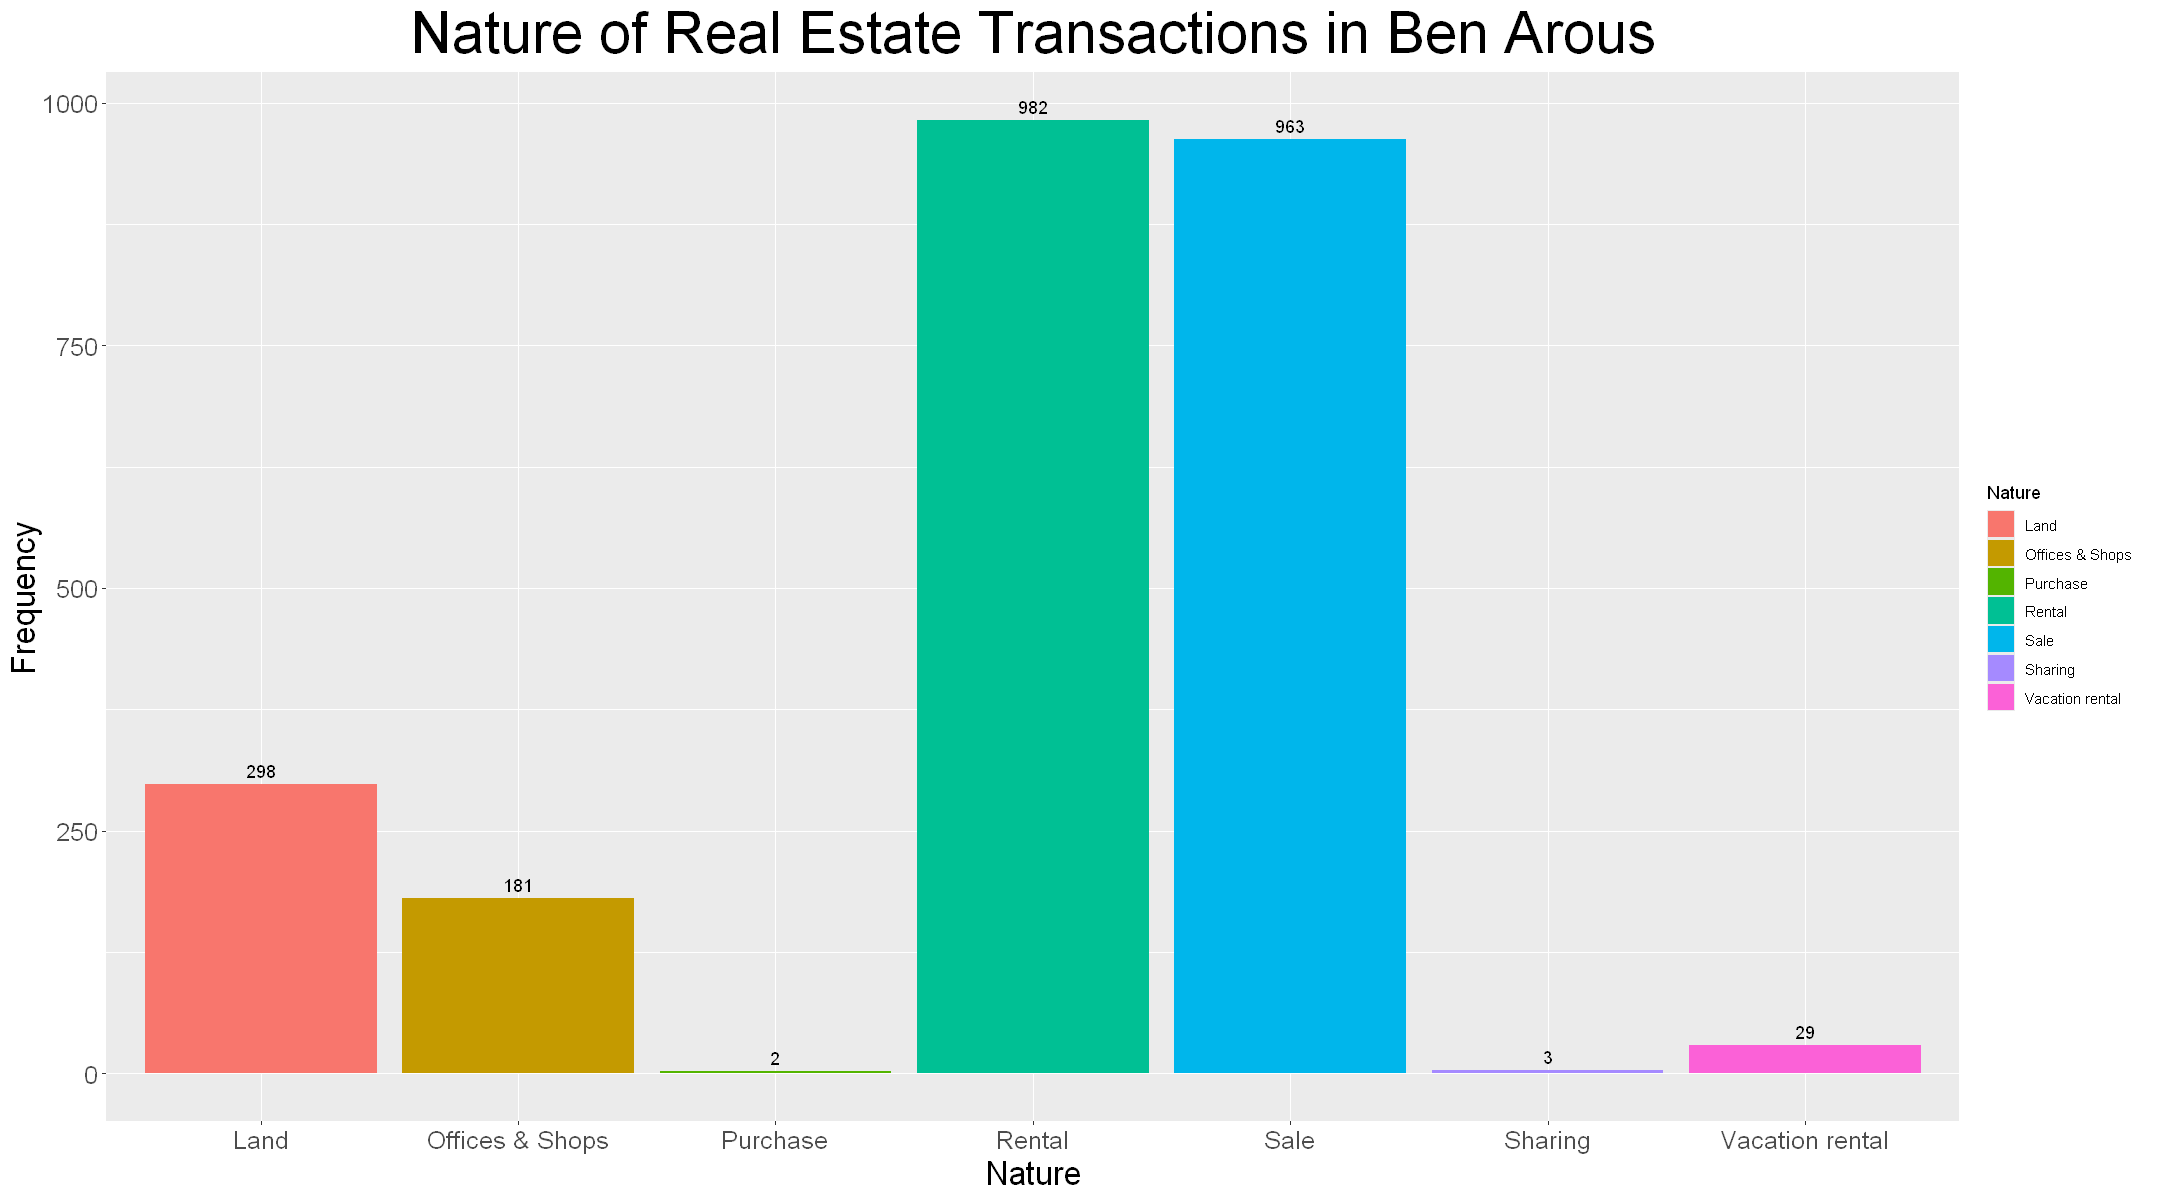

In [23]:
# Bar plot for Nature of Real Estate Transactions in Ben Arous
ben_arous_nature_plot <- ggplot(data_ben_arous, aes(x = Nature, fill = Nature)) +
    geom_bar(stat = "count", width = 0.9) +
    geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5) +
    ggtitle("Nature of Real Estate Transactions in Ben Arous") +
    xlab("Nature") +
    ylab("Frequency")+
    theme(axis.text.x = element_text(hjust = 0.5),
                axis.text = element_text(size = 15),
                axis.title = element_text(size = 20),
                plot.title = element_text(size = 35,hjust = 0.5))

ben_arous_nature_plot

# Save the bar plot for Nature of Real Estate Transactions in Ben Arous
ggsave("plots/Nature of Real Estate Transactions in Ben Arous.png", ben_arous_nature_plot, width = 18, height = 10)

>Insights:
- looking at this plot , we can clearly see that both **rental** **Sale** are the two most common natures of real estate transactions in the Ben Arous governorate with almost 1,000 transactions for each. followed by the **Land** nature with nearly 300 transactions and the **Offices & Shops** with 181 transactions.

#### Types of real estates:

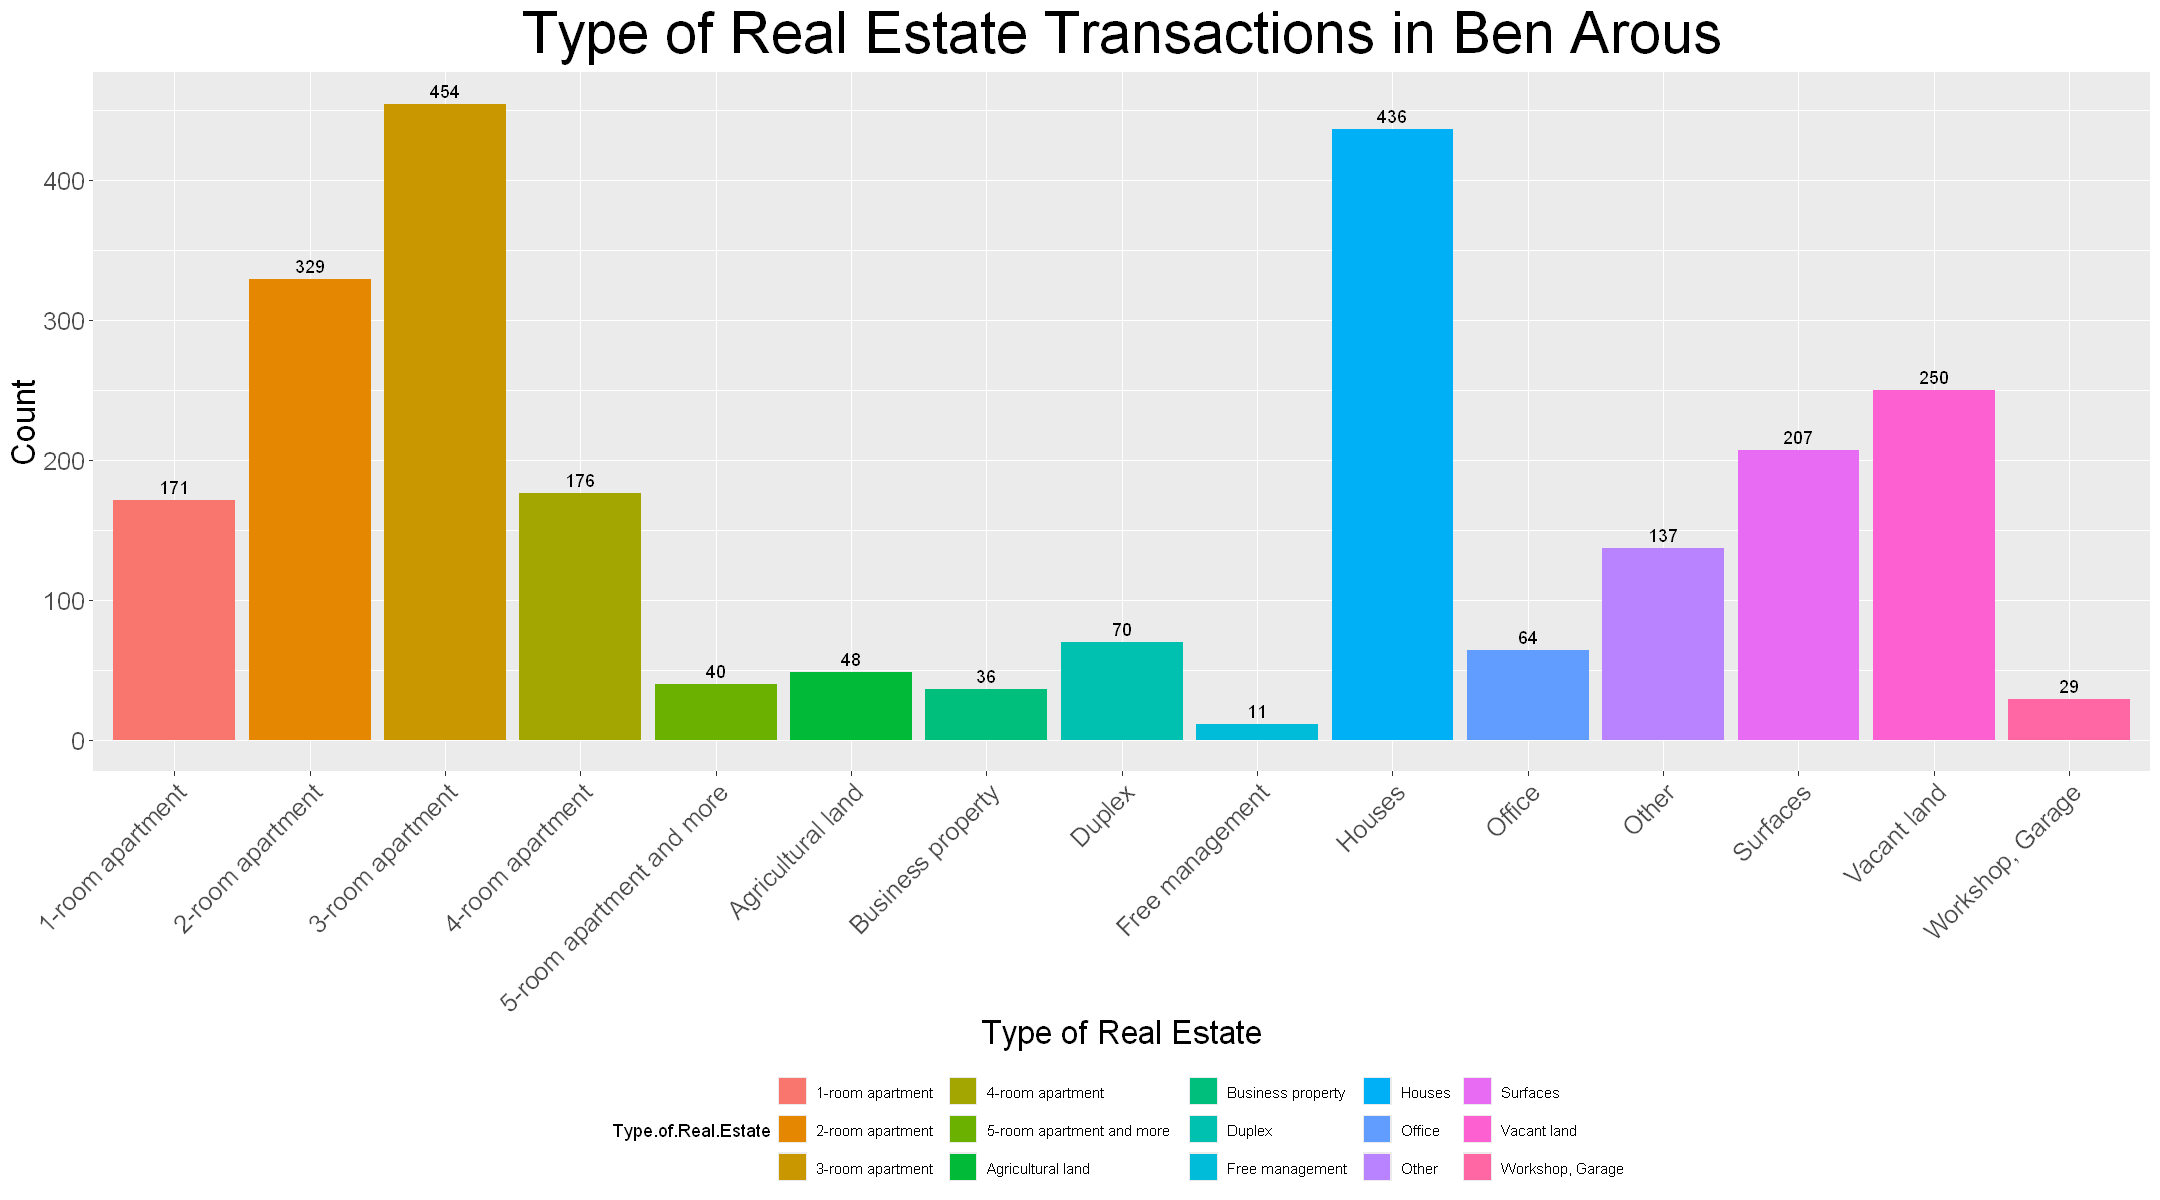

In [24]:
ben_arous_type_of_estate_bar_plot <- ggplot(data_ben_arous, aes(x = Type.of.Real.Estate, fill = Type.of.Real.Estate)) +
  geom_bar(stat = "count", width = 0.9) +
  geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5) +
  ggtitle("Type of Real Estate Transactions in Ben Arous") +
  xlab("Type of Real Estate") +
  ylab("Count") +
  theme(legend.position = "bottom",
        axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for better readability
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35, hjust = 0.5))

ben_arous_type_of_estate_bar_plot
ggsave("plots/Type of Real Estate Transactions in Ben Arous.png", ben_arous_type_of_estate_bar_plot, width = 18, height = 10)

>Insights:
- Just like Tunis and Ariana governorates , the most common types of real estates in Ben Arous are the **Houses** and the **Apartement** with nearly 450 transcations each , then we have the **Vacant land** with 250 transactions and at the bottom we have just like the Ariana governorate the **Agricultural land** ,**Business property** and the **Workshop Garage**.

#### Mean prices of houses by delegation:

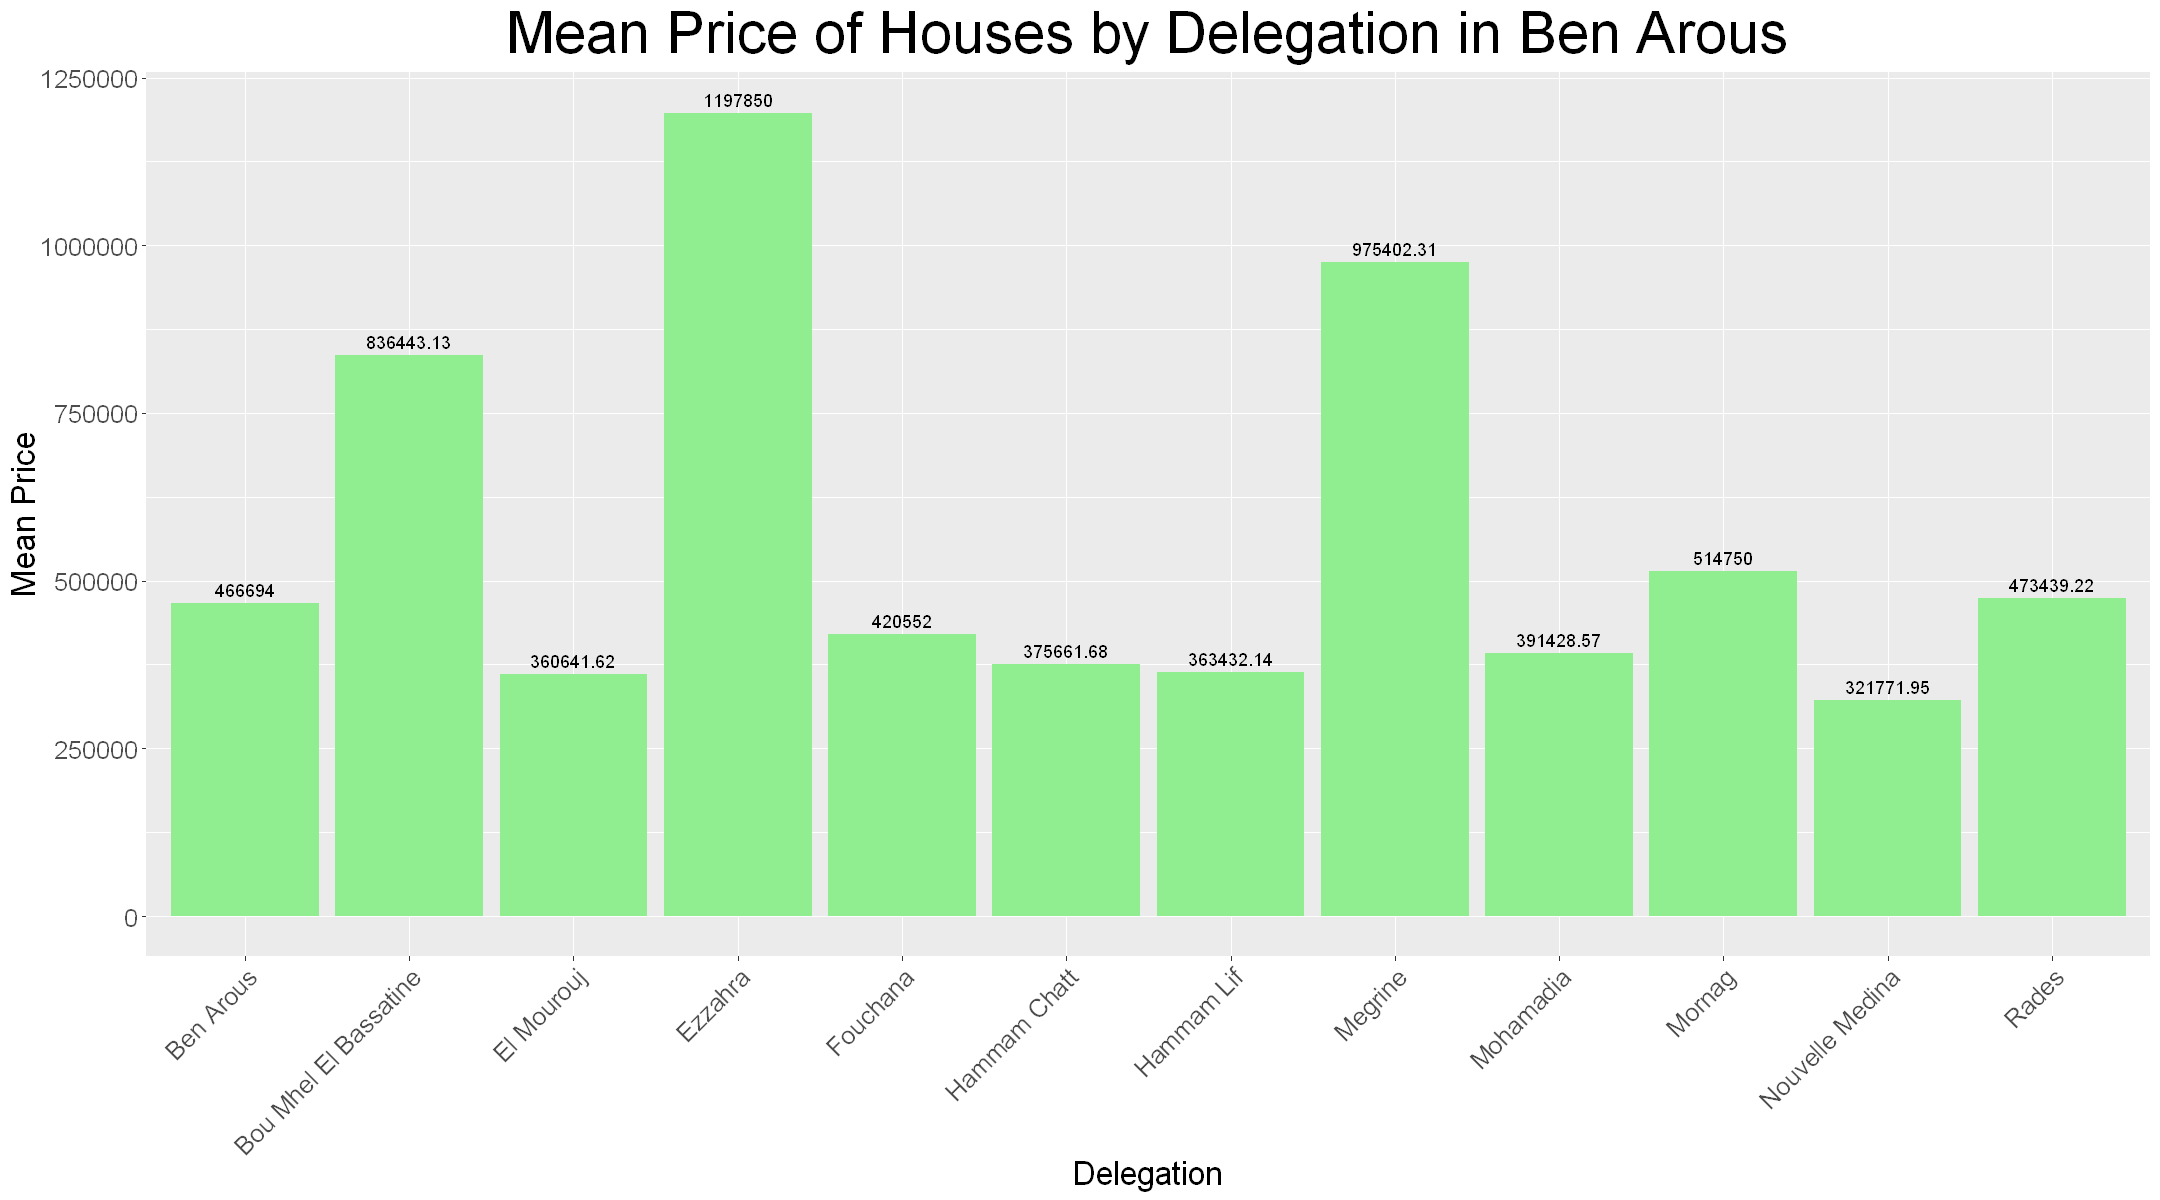

In [25]:
data_ben_arous_houses <- subset(data_ben_arous, Type.of.Real.Estate == "Houses")
ben_arous_mean_price_by_delegation_houses <- aggregate(Price ~ Delegation, data = data_ben_arous_houses, FUN = mean)
ben_arous_mean_price_by_delegation_houses <- ben_arous_mean_price_by_delegation_houses[order(ben_arous_mean_price_by_delegation_houses$Price, decreasing = TRUE), ]
ben_arous_mean_price_by_delegation_houses_bar_plot <- ggplot(ben_arous_mean_price_by_delegation_houses, aes(x = Delegation, y = Price)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  geom_text(aes(label = round(Price, 2)), vjust = -0.5) +
  ggtitle("Mean Price of Houses by Delegation in Ben Arous") +
  xlab("Delegation") +
  ylab("Mean Price") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for better readability
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35, hjust = 0.5))

ben_arous_mean_price_by_delegation_houses_bar_plot
ggsave("plots/Mean Price of Real Estate Transactions by Delegation in Ben Arous.png", ben_arous_mean_price_by_delegation_houses_bar_plot, width = 18, height = 10)

>Insights:
- from this plot ,we can assume that **Ezzahra** delegation has the highest priced houses in the Ben Arous Governorate with a mean of 1,197,850 TND , followed by both **Megrine** and **Bou Mhel El Bassatine** with a mean of 975,402.31 TND and 836,443.13 TND respectively , and at the bottom we have **Nouvelle Medina** with a mean price of 321,771 TND.

>Conclusion:
- after visualizing the data of the four governorates , we can conclude that:
    - in termes of the Nature of the real estate transactions , **Rental** and **Sales** are the most common ones,while the **vacation rental** and **Sharing** are the rarest.
    - As for the types of real estate transactions , **Houses** and **appartements** are the most common ,while **Free management** and **Workshop Garages** are the rarest.
    - The mean prices of houses however differs from one govenorate to another:
        - in Tunis , the mean prices start from 125,195 TND and goes up to 2,233,333 TND.
        - in Ariana , the mean prices start from 150,300 TND and goes up reaching 2,400,000 TND.
        - in Nabeul , the mean prices start from 229,618 TND and goes up to 1,593,036 TND.
        - as for Ben Arous , the mean price start from 321,771 TND and rises to 1,197,850 TND.


## Data Analysis:

- since we have only 2 numeric columns in the dataset, we will try to find the corrolations between them in each governorate.

#### correlation between price and surface in tunis governorate:

[1] "Correlation between Price and Surface:  -0.000599459422850535"


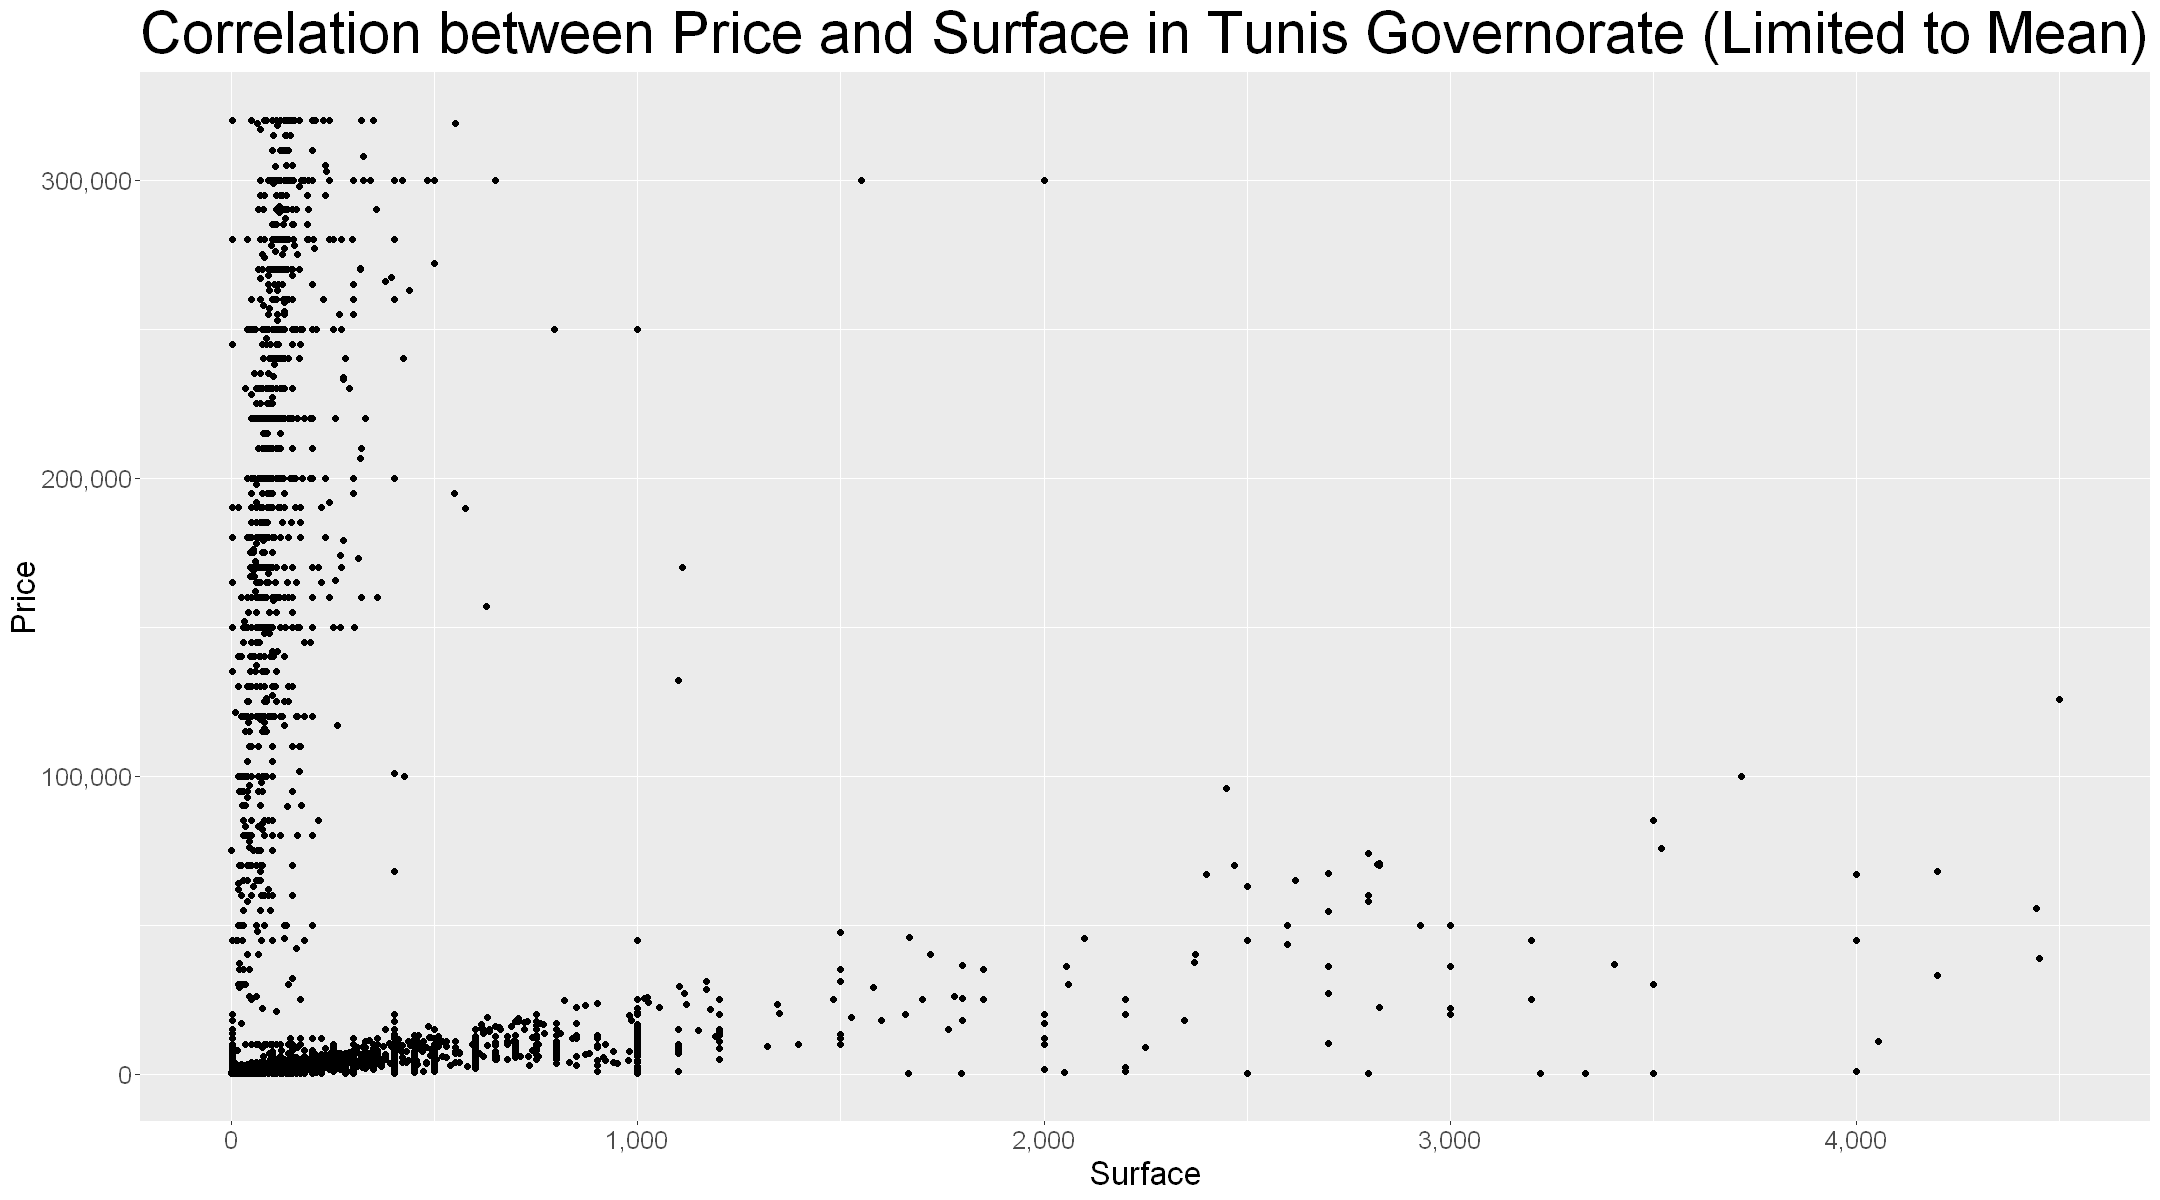

In [26]:
# Calculate the mean of Surface and Price
mean_surface <- mean(data_tunis$Surface, na.rm = TRUE)
mean_price <- mean(data_tunis$Price, na.rm = TRUE)

# Subset the data
data_tunis_subset <- subset(data_tunis, Surface <= mean_surface & Price <= mean_price)

# Create a scatterplot of price vs surface for the subset data
scatterplot_subset <- ggplot(data_tunis_subset, aes(x = Surface, y = Price)) +
    geom_point() +
    scale_x_continuous(labels = scales::comma) +
    scale_y_continuous(labels = scales::comma) +
    ggtitle("Correlation between Price and Surface in Tunis Governorate (Limited to Mean)") +
    xlab("Surface") +
    ylab("Price")+
    theme(axis.text = element_text(size = 15),
          axis.title = element_text(size = 20),
          plot.title = element_text(size = 35,hjust = 0.5))

# Display the plot
scatterplot_subset

# Save the plot
ggsave("plots/scatterplot_subset.png", scatterplot_subset, width = 18, height = 12, dpi = 300)

# Calculate and display the correlation
correlation <- cor(data_tunis_subset$Surface, data_tunis_subset$Price, use = "complete.obs")
print(paste("Correlation between Price and Surface: ", correlation))

- there is no correlation between prices and surfaces in tunis

#### correlation between price and surface in Ariana governorate:

[1] "Correlation between Price and Surface in Ariana:  0.290429757128091"


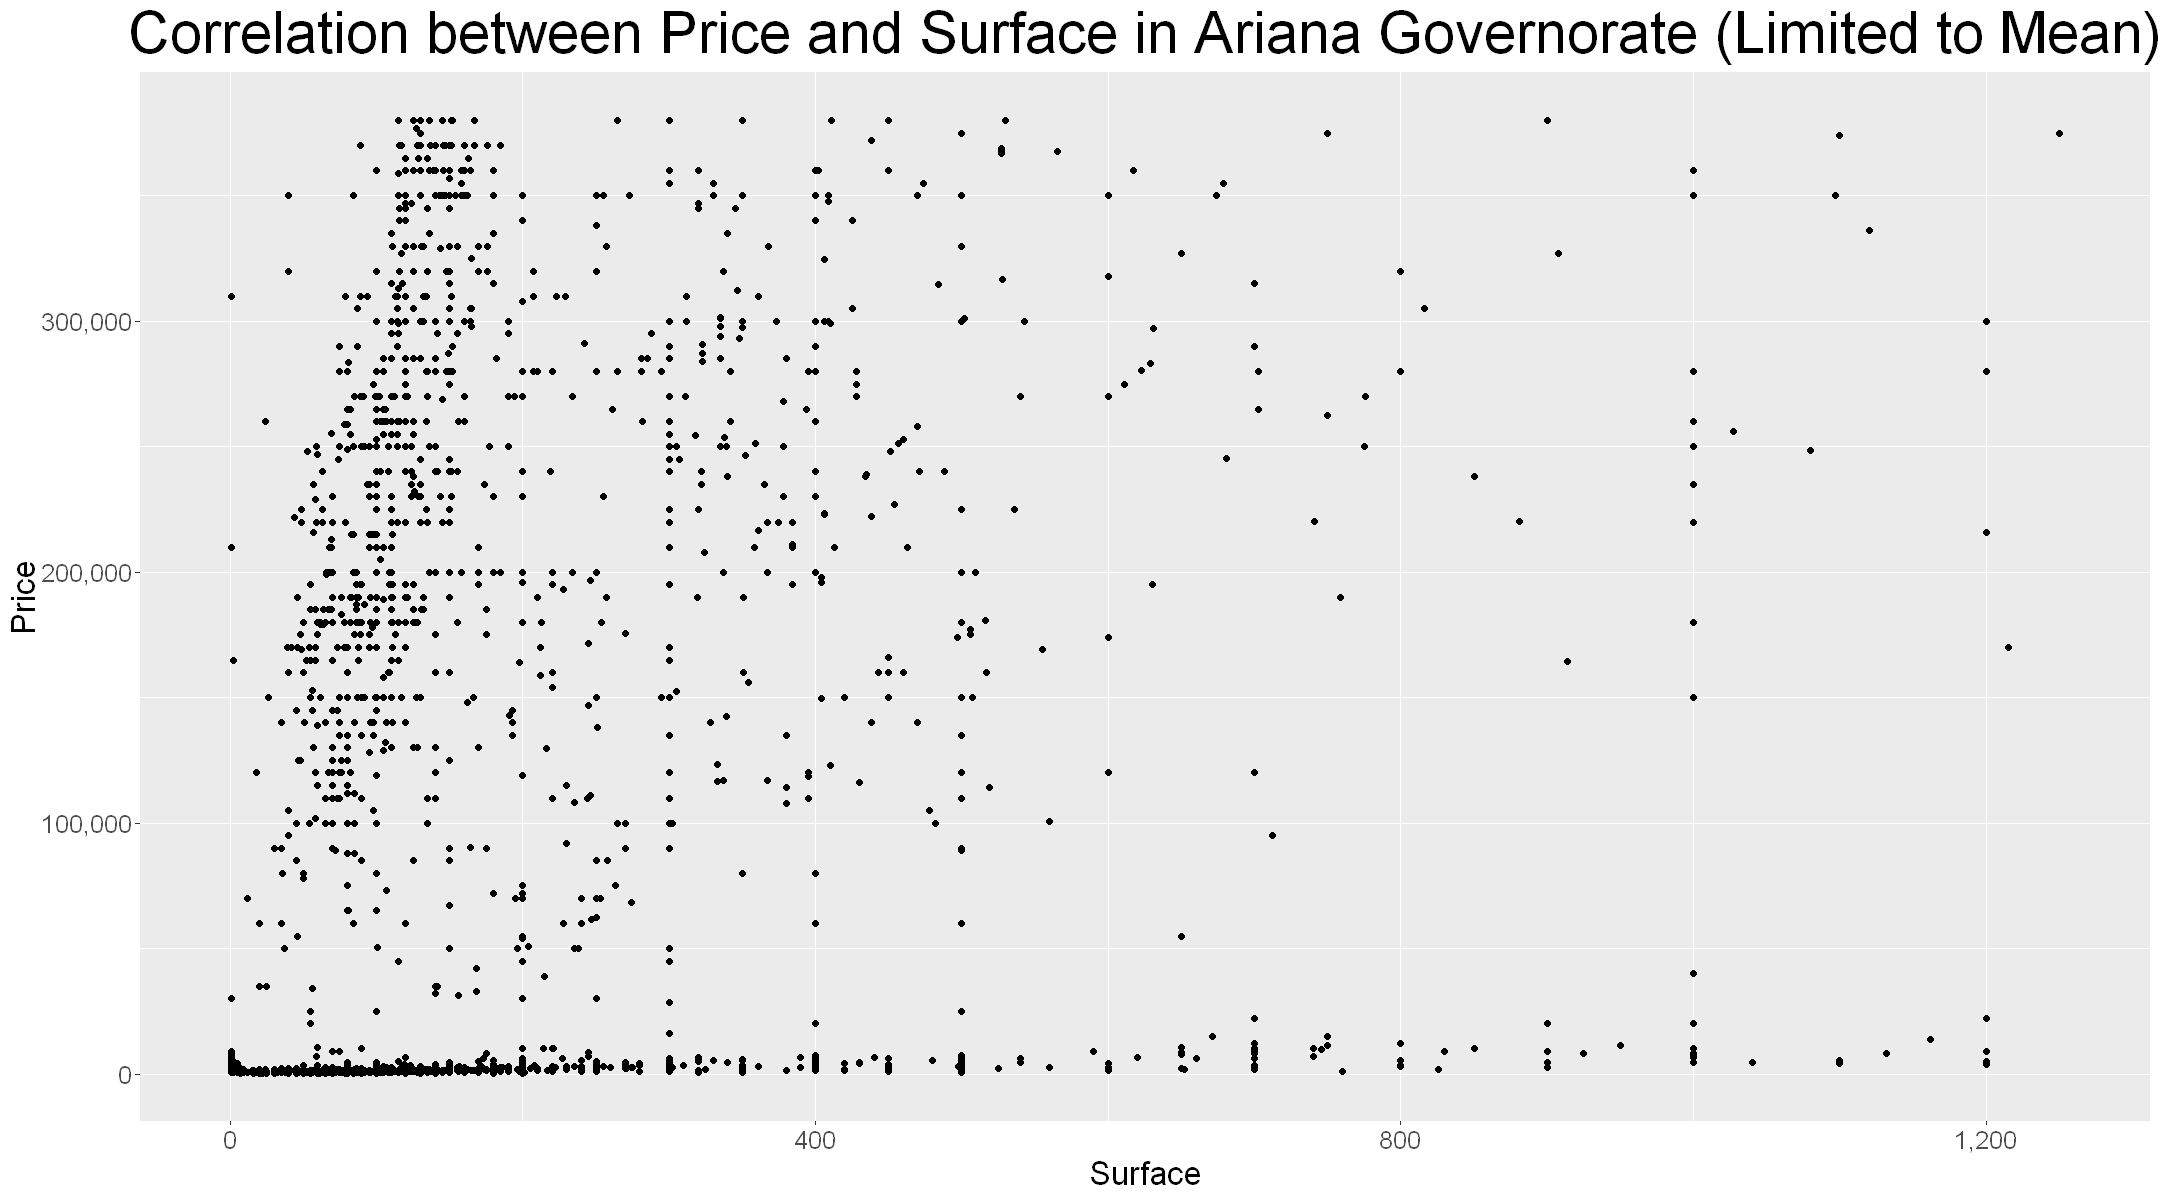

In [27]:
# Calculate the mean of Surface and Price
mean_surface_ariana <- mean(data_ariana$Surface, na.rm = TRUE)
mean_price_ariana <- mean(data_ariana$Price, na.rm = TRUE)

# Subset the data
data_ariana_subset <- subset(data_ariana, Surface <= mean_surface_ariana & Price <= mean_price_ariana)

# Create a scatterplot of price vs surface for the subset data
scatterplot_subset_ariana <- ggplot(data_ariana_subset, aes(x = Surface, y = Price)) +
    geom_point() +
    scale_x_continuous(labels = scales::comma) +
    scale_y_continuous(labels = scales::comma) +
    ggtitle("Correlation between Price and Surface in Ariana Governorate (Limited to Mean)") +
    xlab("Surface") +
    ylab("Price")+
    theme(axis.text = element_text(size = 15),
          axis.title = element_text(size = 20),
          plot.title = element_text(size = 35,hjust = 0.5))

# Display the plot
print(scatterplot_subset_ariana)

# Save the plot
ggsave("plots/scatterplot_subset_ariana.png", scatterplot_subset_ariana, width = 10, height = 10, dpi = 300)

# Calculate and display the correlation
correlation_ariana <- cor(data_ariana_subset$Surface, data_ariana_subset$Price, use = "complete.obs")
print(paste("Correlation between Price and Surface in Ariana: ", correlation_ariana))

- there is a positive low correlation between prices and surface in ariana.

#### correlation between price and surface in Ben Arous governorate:

[1] "Correlation between Price and Surface in Ben Arous:  0.152046959272214"


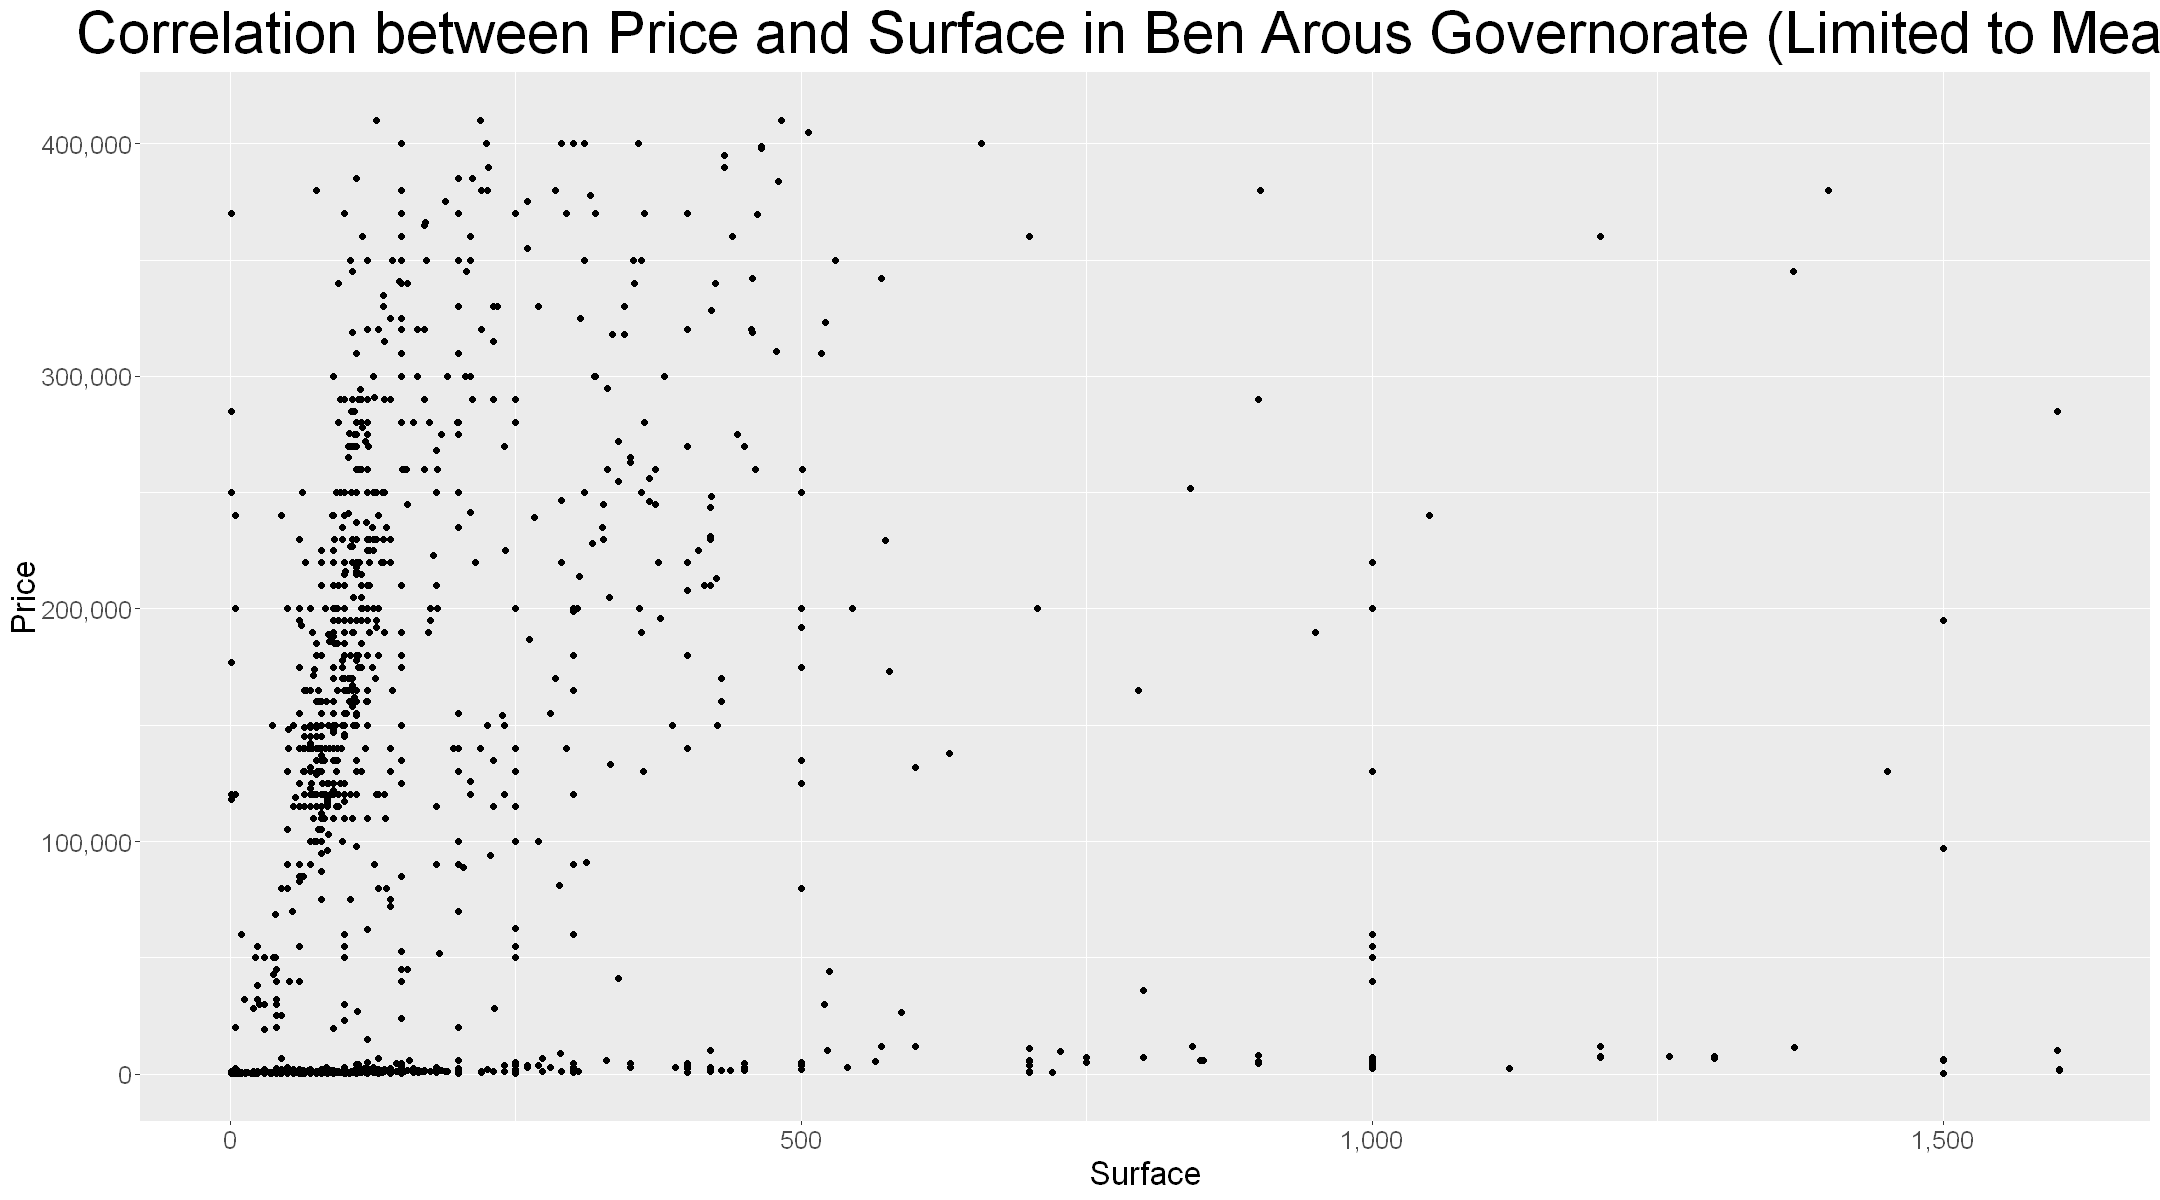

In [28]:
# Calculate the mean of Surface and Price
mean_surface_ben_arous <- mean(data_ben_arous$Surface, na.rm = TRUE)
mean_price_ben_arous <- mean(data_ben_arous$Price, na.rm = TRUE)

# Subset the data
data_ben_arous_subset <- subset(data_ben_arous, Surface <= mean_surface_ben_arous & Price <= mean_price_ben_arous)

# Create a scatterplot of price vs surface for the subset data
scatterplot_subset_ben_arous <- ggplot(data_ben_arous_subset, aes(x = Surface, y = Price)) +
    geom_point() +
    scale_x_continuous(labels = scales::comma) +
    scale_y_continuous(labels = scales::comma) +
    ggtitle("Correlation between Price and Surface in Ben Arous Governorate (Limited to Mean)") +
    xlab("Surface") +
    ylab("Price") +
    theme(axis.text = element_text(size = 15),
          axis.title = element_text(size = 20),
          plot.title = element_text(size = 35,hjust = 0.5))

# Display the plot
scatterplot_subset_ben_arous

# Save the plot
ggsave("plots/scatterplot_subset_ben_arous.png", scatterplot_subset_ben_arous, width = 10, height = 10, dpi = 300)

# Calculate and display the correlation
correlation_ben_arous <- cor(data_ben_arous_subset$Surface, data_ben_arous_subset$Price, use = "complete.obs")
print(paste("Correlation between Price and Surface in Ben Arous: ", correlation_ben_arous))

- there is a positive low correlation between price and surface in Ben Arous.

#### correlation between price and surface in Nabeul governorate:

[1] "Correlation between Price and Surface in Nabeul:  0.0757369016234858"


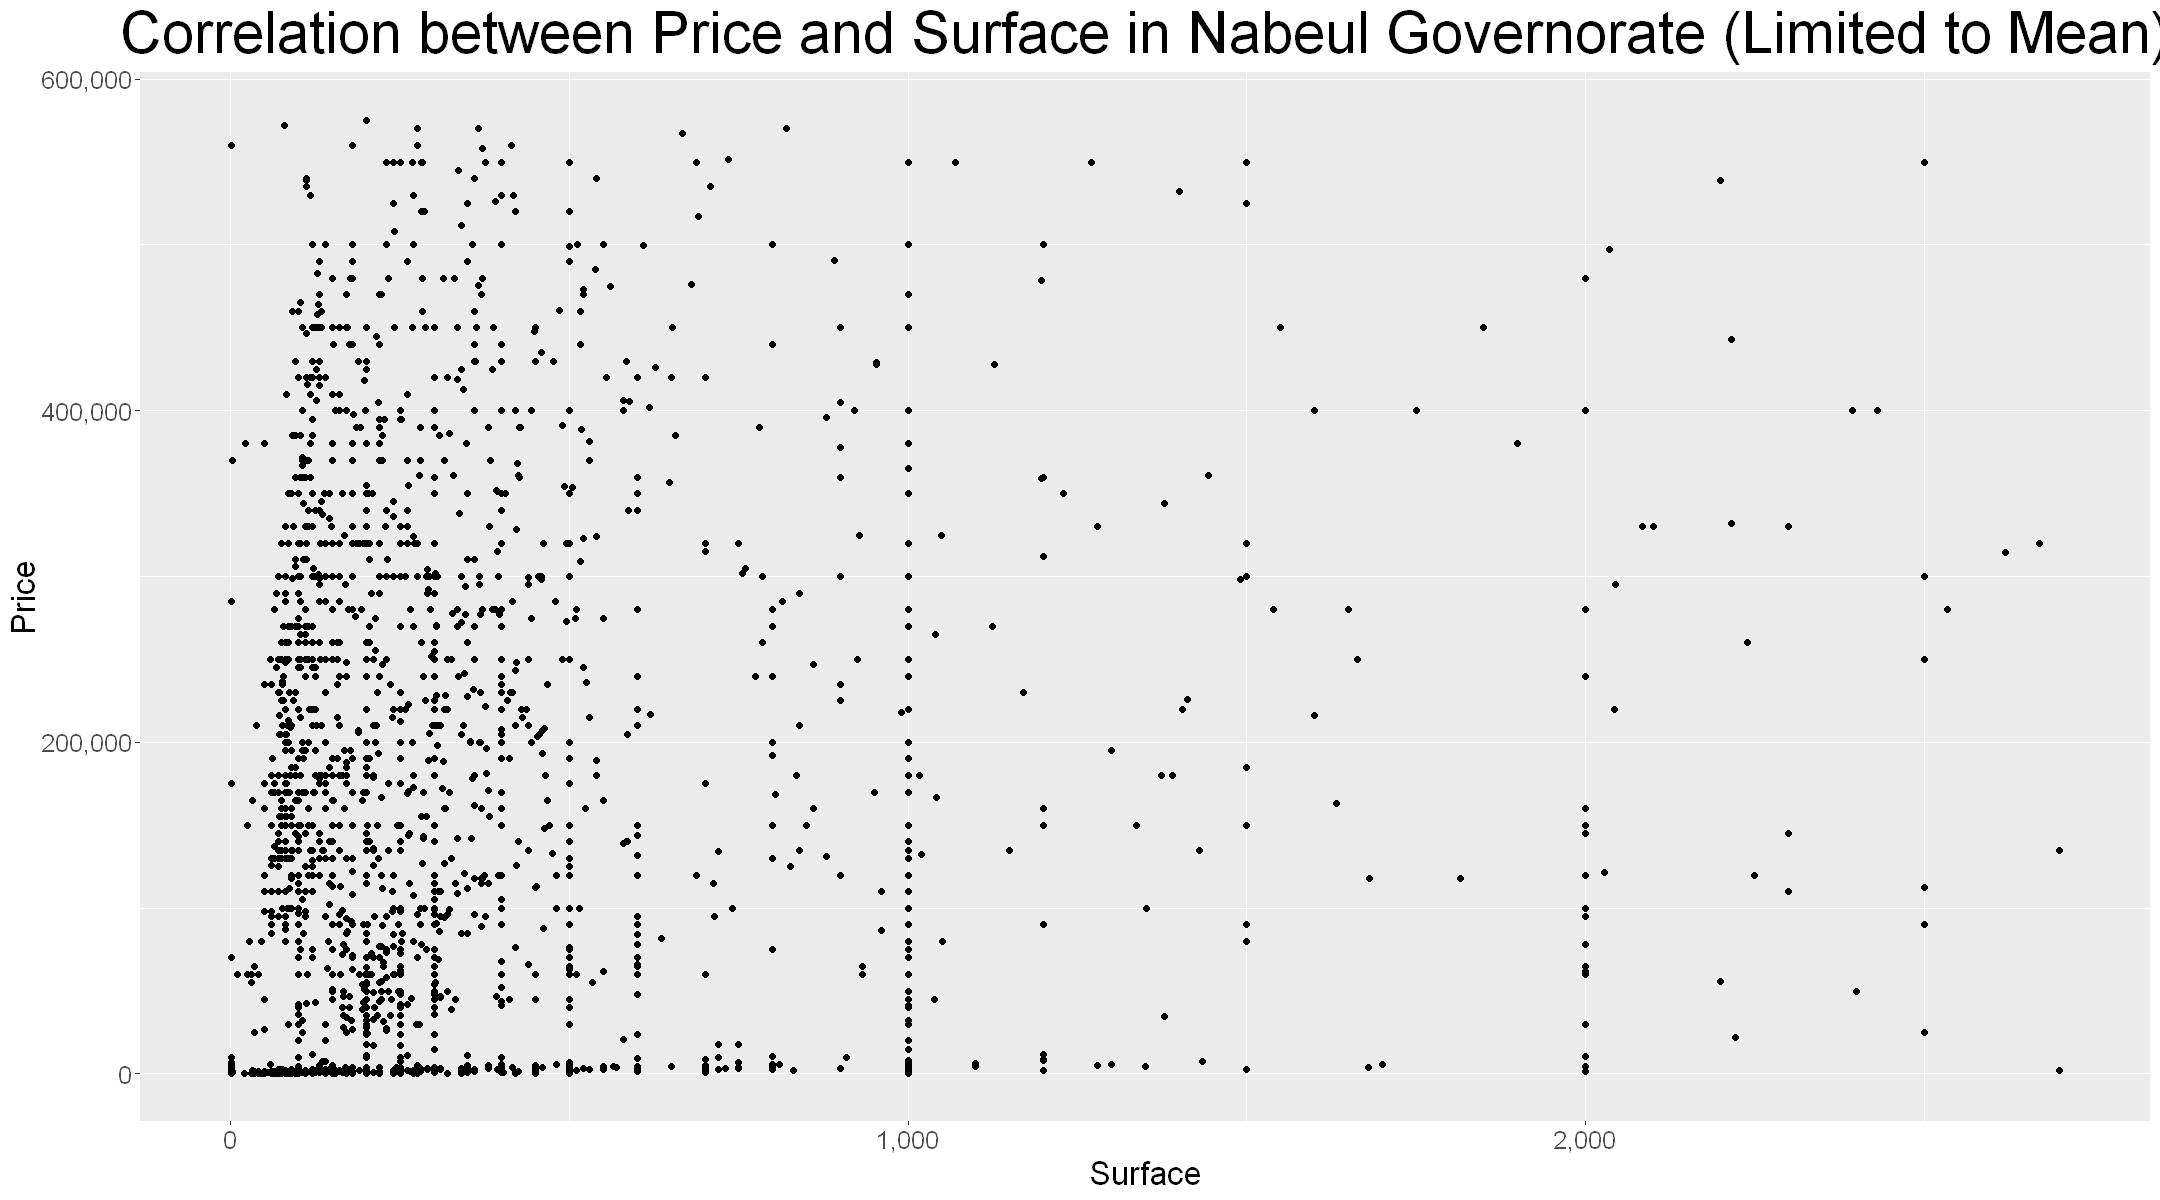

In [29]:
# Calculate the mean of Surface and Price
mean_surface_nabeul <- mean(data_nabeul$Surface, na.rm = TRUE)
mean_price_nabeul <- mean(data_nabeul$Price, na.rm = TRUE)

# Subset the data
data_nabeul_subset <- subset(data_nabeul, Surface <= mean_surface_nabeul & Price <= mean_price_nabeul)

# Create a scatterplot of price vs surface for the subset data
scatterplot_subset_nabeul <- ggplot(data_nabeul_subset, aes(x = Surface, y = Price)) +
    geom_point() +
    scale_x_continuous(labels = scales::comma) +
    scale_y_continuous(labels = scales::comma) +
    ggtitle("Correlation between Price and Surface in Nabeul Governorate (Limited to Mean)") +
    xlab("Surface") +
    ylab("Price") +
    theme(axis.text = element_text(size = 15),
          axis.title = element_text(size = 20),
          plot.title = element_text(size = 35,hjust = 0.5))

# Display the plot
scatterplot_subset_nabeul

# Save the plot
ggsave("plots/scatterplot_subset_nabeul.png", scatterplot_subset_nabeul, width = 10, height = 10, dpi = 300)

# Calculate and display the correlation
correlation_nabeul <- cor(data_nabeul_subset$Surface, data_nabeul_subset$Price, use = "complete.obs")
print(paste("Correlation between Price and Surface in Nabeul: ", correlation_nabeul))

there is no correlation between price and surface in nabeul.

### Price Surface Correlation in the entire dataset:

In [30]:
cor(data$Price,data$Surface)

[1] 0.1180349

> Overall There is a very Low Positive correlation between those two variables.

## Conclusion:

>Based on the detailed analysis of real estate transactions  several key conclusions can be drawn:

- Nature of Transactions:
Rental and sale transactions are the most common across all governorates, while vacation rental and sharing transactions are relatively rare.

- Types of Real Estate:
Houses and apartments are the most common types of transactions, while free management and workshop garages are less common.

- Price Ranges:
Mean house prices vary across governorates, with the highest mean prices observed in La Goulette (Tunis), Beni Khiar (Nabeul), Kalaat Landlous (Ariana), and Ezzahra (Ben Arous).

 - Correlation between Price and Surface:
    There is no correlation between prices and surfaces in Tunis, indicating that prices do not significantly depend on surface area.

    In Ben Arous, there is a positive but low correlation between price and surface, suggesting that as surface area increases, prices also tend to increase slightly.

>In conclusion, the real estate market in Tunisia, particularly in the four governorates analyzed, shows a strong preference for rental and sale transactions, with houses and apartments being the most common types of properties. Prices vary significantly between governorates, indicating diverse market conditions. Additionally, the correlation between price and surface area varies, with no significant correlation in Tunis and a slight positive correlation in Ben Arous. These findings can provide valuable insights for stakeholders, investors, and policymakers in the real estate sector